# Glasgow Intermediate Zones Visualization

This notebook loads and visualizes the Glasgow intermediate zones dataset, showing the geographic distribution of different regions and their characteristics.

## Dataset
- **Source**: `data/processed/glasgow_intermediate_zones.gpkg`
- **Alternative**: `data/processed/glasgow_intermediate_zones.geojson`
- **Content**: Geographic boundaries and attributes of Glasgow intermediate zones

## Visualizations
1. **Basic Map**: Overview of all intermediate zones
2. **Choropleth Maps**: Color-coded by different attributes
3. **Interactive Map**: Folium-based interactive visualization

In [12]:
# Import required libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [13]:
# Load the Glasgow intermediate zones data
data_dir = Path("../../data/processed")
gpkg_file = data_dir / "glasgow_intermediate_zones.gpkg"
geojson_file = data_dir / "glasgow_intermediate_zones.geojson"

# Try to load the GeoPackage first, fallback to GeoJSON
if gpkg_file.exists():
    print(f"📂 Loading data from: {gpkg_file}")
    gdf = gpd.read_file(gpkg_file)
    print(f"✅ Loaded from GeoPackage")
elif geojson_file.exists():
    print(f"📂 Loading data from: {geojson_file}")
    gdf = gpd.read_file(geojson_file)
    print(f"✅ Loaded from GeoJSON")
else:
    raise FileNotFoundError("Neither GeoPackage nor GeoJSON file found")

# Display basic information
print(f"📊 Dataset Info:")
print(f"   - Number of zones: {len(gdf)}")
print(f"   - Columns: {len(gdf.columns)}")
print(f"   - CRS: {gdf.crs}")
print(f"   - Geometry type: {gdf.geometry.geom_type.iloc[0] if len(gdf) > 0 else 'Unknown'}")

📂 Loading data from: ..\..\data\processed\glasgow_intermediate_zones.gpkg
✅ Loaded from GeoPackage
📊 Dataset Info:
   - Number of zones: 138
   - Columns: 58
   - CRS: EPSG:27700
   - Geometry type: MultiPolygon


In [35]:
# Display sample rows from the dataset in tabular format
print("📋 Sample rows from the Glasgow Intermediate Zones dataset:")
print("=" * 60)

# Get non-geometry columns
non_geom_cols = [col for col in gdf.columns if col != 'geometry']

# Display first 10 rows as a clean DataFrame
print(f"📊 Showing first 10 zones out of {len(gdf)} total zones:")
print(f"💡 Dataset shape: {gdf.shape[0]} rows × {gdf.shape[1]} columns")
print()

# Display the DataFrame directly for better visualization
gdf[non_geom_cols].head(10)

📋 Sample rows from the Glasgow Intermediate Zones dataset:
📊 Showing first 10 zones out of 138 total zones:
💡 Dataset shape: 138 rows × 58 columns



objectid  interzone                     name  totpop2011  respop2011  \
0         1  S02001842             Darnley East        5033        4970   
1         2  S02001843            Darnley North        2813        2716   
2         3  S02001844             Darnley West        4741        4642   
3         4  S02001845                 Nitshill        5836        5764   
4         5  S02001846          Crookston South        3387        3342   
5         6  S02001853                  Penilee        5309        5261   
6         7  S02001854               Hillington        3519        3519   
7         8  S02001855  Drumoyne and Shieldhall        6268        6191   
8         9  S02001856      Govan and Linthouse        4899        4822   
9        10  S02001857                 Craigton        3303        3303   

   hhcnt2011   stdareaha  stdareakm2  population  five_year_population  ...  \
0       2123  100.699216    1.006994        5104                 25520  ...   
1       1131  358.577995    3.585779        3542                 17710  ...   
2       1680  123.275588    1.232757        5461                 27305  ...   
3       2590  196.969413    1.969695        6330                 31650  ...   
4       1439   83.574894    0.835750        3380                 16900  ...   
5       2300   88.266227    0.882666        5279                 26395  ...   
6       1628   54.671807    0.546720        3377                 16885  ...   
7       3173  328.281176    3.282811        6241                 31205  ...   
8       2687  162.864953    1.628651        6065                 30325  ...   
9       1770  100.520734    1.005210        3516                 17580  ...   

         hbt  departmenttype  avg_numberofattendancesall  \
0       None            None                         NaN   
1       None            None                         NaN   
2       None            None                         NaN   
3       None            None                         NaN   
4       None            None                         NaN   
5       None            None                         NaN   
6       None            None                         NaN   
7  S08000031          Type 1                 6158.152778   
8       None            None                         NaN   
9       None            None                         NaN   

   avg_numberwithin4hoursall  avg_numberover4hoursall  \
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
5                        NaN                      NaN   
6                        NaN                      NaN   
7                 4785.00463              1373.148148   
8                        NaN                      NaN   
9                        NaN                      NaN   

   avg_numberofattendancesepisode  avg_numberwithin4hoursepisode  \
0                             NaN                            NaN   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   
5                             NaN                            NaN   
6                             NaN                            NaN   
7                     6158.152778                     4785.00463   
8                             NaN                            NaN   
9                             NaN                            NaN   

   avg_numberover4hoursepisode  avg_numberover8hoursepisode  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                

In [15]:
# Check for duplicate values in the 'name' column
print("🔍 Checking for duplicate names in the dataset:")
print("=" * 50)

# Check if 'name' column exists
if 'name' in gdf.columns:
    total_zones = len(gdf)
    unique_names = gdf['name'].nunique()
    duplicate_count = total_zones - unique_names
    
    print(f"📊 Name Analysis:")
    print(f"   - Total zones: {total_zones}")
    print(f"   - Unique names: {unique_names}")
    print(f"   - Duplicate names: {duplicate_count}")
    
    if duplicate_count == 0:
        print("✅ All zone names are unique!")
    else:
        print(f"⚠️ Found {duplicate_count} duplicate names")
        
        # Show which names are duplicated
        duplicated_names = gdf[gdf.duplicated(subset=['name'], keep=False)]['name'].value_counts()
        print(f"\n🔄 Duplicated names:")
        for name, count in duplicated_names.items():
            print(f"   - '{name}': appears {count} times")
        
        # Show the actual rows with duplicated names
        print(f"\n📋 Rows with duplicated names:")
        duplicate_rows = gdf[gdf.duplicated(subset=['name'], keep=False)].sort_values('name')
        display_cols = [col for col in duplicate_rows.columns if col != 'geometry'][:5]
        duplicate_rows[display_cols]
        
else:
    print("❌ Column 'name' not found in the dataset")
    print("📋 Available columns:")
    for col in gdf.columns:
        if col != 'geometry':
            print(f"   - {col}")

# Also check for null/empty names
if 'name' in gdf.columns:
    null_names = gdf['name'].isnull().sum()
    empty_names = (gdf['name'].str.strip() == '').sum() if gdf['name'].dtype == 'object' else 0
    
    print(f"\n🔍 Data Quality Check:")
    print(f"   - Null names: {null_names}")
    print(f"   - Empty names: {empty_names}")
    
    if null_names > 0 or empty_names > 0:
        print("⚠️ Some zones have missing names")
    else:
        print("✅ All zones have valid names")

🔍 Checking for duplicate names in the dataset:
📊 Name Analysis:
   - Total zones: 138
   - Unique names: 136
   - Duplicate names: 2
⚠️ Found 2 duplicate names

🔄 Duplicated names:
   - 'Battlefield': appears 2 times
   - 'Kelvinside and Jordanhill': appears 2 times

📋 Rows with duplicated names:

🔍 Data Quality Check:
   - Null names: 0
   - Empty names: 0
✅ All zones have valid names

📊 Name Analysis:
   - Total zones: 138
   - Unique names: 136
   - Duplicate names: 2
⚠️ Found 2 duplicate names

🔄 Duplicated names:
   - 'Battlefield': appears 2 times
   - 'Kelvinside and Jordanhill': appears 2 times

📋 Rows with duplicated names:

🔍 Data Quality Check:
   - Null names: 0
   - Empty names: 0
✅ All zones have valid names


In [16]:
# Check for duplicate values in the interzone code column
print("🔍 Checking for duplicate interzone codes in the dataset:")
print("=" * 55)

# First, identify potential interzone code columns
potential_code_cols = []
for col in gdf.columns:
    if col != 'geometry':
        col_lower = col.lower()
        if any(keyword in col_lower for keyword in ['code', 'id', 'interzone', 'iz', 'zone_id']):
            potential_code_cols.append(col)

print(f"📋 Potential interzone code columns found:")
for i, col in enumerate(potential_code_cols):
    print(f"   {i+1}. {col}")

# If we found potential columns, check the most likely one
if potential_code_cols:
    # Use the first potential column (most likely candidate)
    code_col = potential_code_cols[0]
    
    print(f"\n🔍 Analyzing column: '{code_col}'")
    print("-" * 40)
    
    total_zones = len(gdf)
    unique_codes = gdf[code_col].nunique()
    duplicate_count = total_zones - unique_codes
    
    print(f"📊 Code Analysis:")
    print(f"   - Total zones: {total_zones}")
    print(f"   - Unique codes: {unique_codes}")
    print(f"   - Duplicate codes: {duplicate_count}")
    
    if duplicate_count == 0:
        print("✅ All interzone codes are unique!")
    else:
        print(f"⚠️ Found {duplicate_count} duplicate codes")
        
        # Show which codes are duplicated
        duplicated_codes = gdf[gdf.duplicated(subset=[code_col], keep=False)][code_col].value_counts()
        print(f"\n🔄 Duplicated codes:")
        for code, count in duplicated_codes.head(10).items():  # Show top 10
            print(f"   - '{code}': appears {count} times")
        
        if len(duplicated_codes) > 10:
            print(f"   ... and {len(duplicated_codes) - 10} more duplicated codes")
        
        # Show sample rows with duplicated codes
        print(f"\n📋 Sample rows with duplicated codes:")
        duplicate_rows = gdf[gdf.duplicated(subset=[code_col], keep=False)].sort_values(code_col)
        display_cols = [col for col in duplicate_rows.columns if col != 'geometry'][:6]
        duplicate_rows[display_cols].head(10)
    
    # Data quality check for codes
    null_codes = gdf[code_col].isnull().sum()
    if gdf[code_col].dtype == 'object':
        empty_codes = (gdf[code_col].str.strip() == '').sum()
    else:
        empty_codes = 0
    
    print(f"\n🔍 Data Quality Check for '{code_col}':")
    print(f"   - Null codes: {null_codes}")
    print(f"   - Empty codes: {empty_codes}")
    print(f"   - Data type: {gdf[code_col].dtype}")
    
    # Show sample of code values
    print(f"\n📄 Sample code values:")
    sample_codes = gdf[code_col].dropna().head(5).tolist()
    for i, code in enumerate(sample_codes):
        print(f"   {i+1}. {code}")
    
    if null_codes > 0 or empty_codes > 0:
        print("⚠️ Some zones have missing codes")
    else:
        print("✅ All zones have valid codes")

else:
    print("❌ No obvious interzone code column found")
    print("\n📋 All available columns (excluding geometry):")
    non_geom_cols = [col for col in gdf.columns if col != 'geometry']
    for i, col in enumerate(non_geom_cols):
        print(f"   {i+1}. {col}")
    print("\n💡 Please specify which column contains the interzone codes")

🔍 Checking for duplicate interzone codes in the dataset:
📋 Potential interzone code columns found:
   1. objectid
   2. interzone
   3. home_accidents_per_1000
   4. road_traffic_accident_per_1000
   5. hospitalcode
   6. postcode

🔍 Analyzing column: 'objectid'
----------------------------------------
📊 Code Analysis:
   - Total zones: 138
   - Unique codes: 136
   - Duplicate codes: 2
⚠️ Found 2 duplicate codes

🔄 Duplicated codes:
   - '20': appears 2 times
   - '109': appears 2 times

📋 Sample rows with duplicated codes:

🔍 Data Quality Check for 'objectid':
   - Null codes: 0
   - Empty codes: 0
   - Data type: int32

📄 Sample code values:
   1. 1
   2. 2
   3. 3
   4. 4
   5. 5
✅ All zones have valid codes

🔄 Duplicated codes:
   - '20': appears 2 times
   - '109': appears 2 times

📋 Sample rows with duplicated codes:

🔍 Data Quality Check for 'objectid':
   - Null codes: 0
   - Empty codes: 0
   - Data type: int32

📄 Sample code values:
   1. 1
   2. 2
   3. 3
   4. 4
   5. 5
✅ 

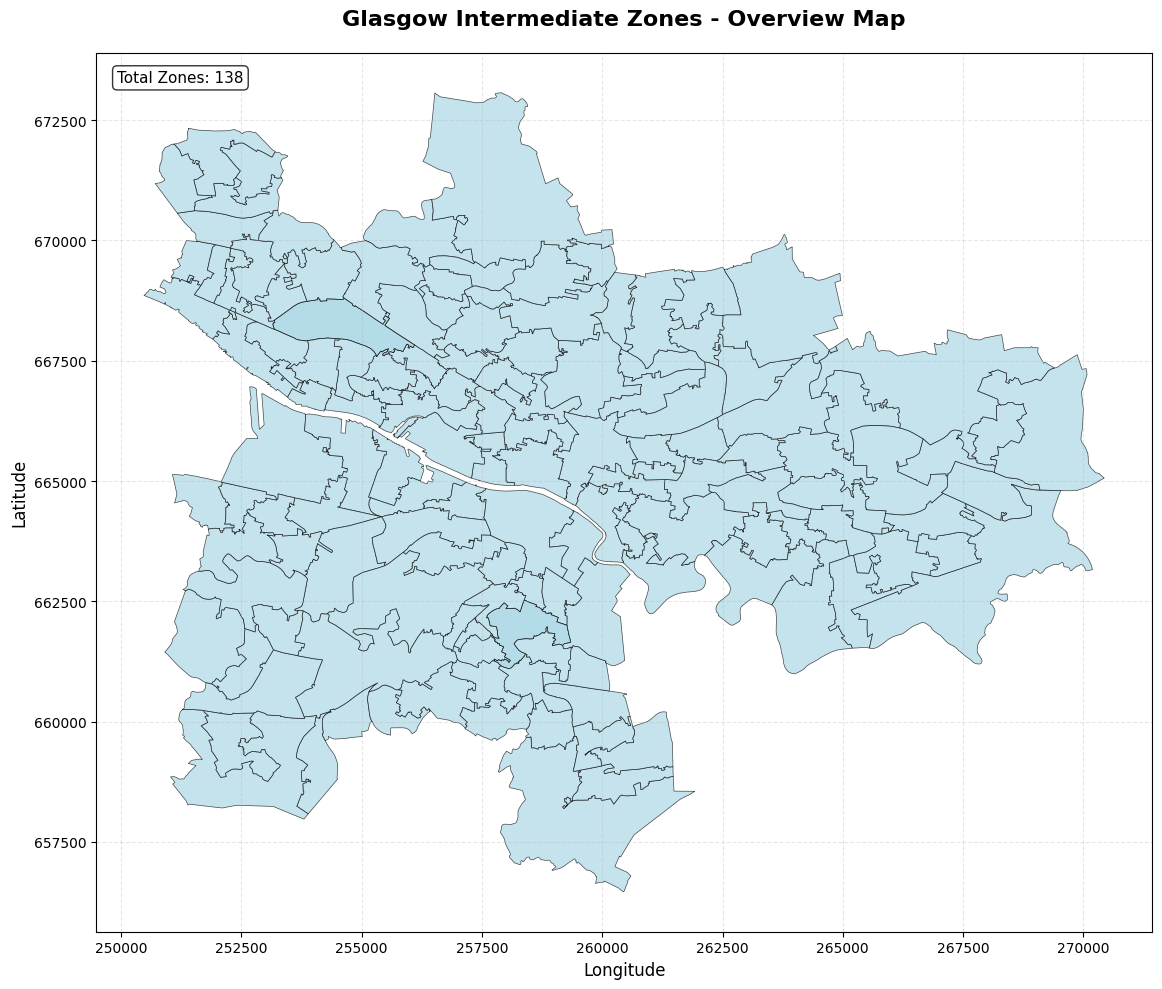

🗺️ Basic overview map created showing 138 intermediate zones


In [17]:
# Create a basic overview map of all intermediate zones
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot all zones with boundary lines
gdf.plot(
    ax=ax,
    color='lightblue',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.7
)

# Customize the plot
ax.set_title('Glasgow Intermediate Zones - Overview Map', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Remove axis ticks for cleaner look
ax.tick_params(axis='both', which='major', labelsize=10)

# Add grid for reference
ax.grid(True, alpha=0.3, linestyle='--')

# Add text with zone count
ax.text(0.02, 0.98, f'Total Zones: {len(gdf)}', transform=ax.transAxes, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        verticalalignment='top', fontsize=11)

plt.tight_layout()
plt.show()

print(f"🗺️ Basic overview map created showing {len(gdf)} intermediate zones")

In [18]:
# Calculate population shares and point distribution
print("🧮 Calculating population shares and point distribution:")
print("=" * 60)

# Remove duplicates to get only unique 136 rows
print("📊 Handling duplicates...")
if 'population' in gdf.columns:
    # Keep only unique rows (remove duplicates)
    gdf_unique = gdf.drop_duplicates().copy()
    print(f"   - Original dataset: {len(gdf)} rows")
    print(f"   - After removing duplicates: {len(gdf_unique)} rows")
    
    # Calculate population share
    print(f"\n📈 Calculating population shares...")
    total_population = gdf_unique['population'].sum()
    print(f"   - Total population: {total_population:,.0f}")
    
    # Create population_share column (as percentage of total)
    gdf_unique['population_share'] = gdf_unique['population'] / total_population
    
    # Create num_points column (proportional to population, total = 50,000 points)
    total_points = 50000
    gdf_unique['num_points'] = (gdf_unique['population_share'] * total_points).round().astype(int)
    
    print(f"   - Total points to distribute: {total_points:,}")
    print(f"   - Actual points distributed: {gdf_unique['num_points'].sum():,}")
    
    # Show summary statistics
    print(f"\n📋 Population Share Statistics:")
    print(f"   - Min population share: {gdf_unique['population_share'].min():.6f} ({gdf_unique['population_share'].min()*100:.4f}%)")
    print(f"   - Max population share: {gdf_unique['population_share'].max():.6f} ({gdf_unique['population_share'].max()*100:.4f}%)")
    print(f"   - Mean population share: {gdf_unique['population_share'].mean():.6f} ({gdf_unique['population_share'].mean()*100:.4f}%)")
    
    print(f"\n📍 Point Distribution Statistics:")
    print(f"   - Min points per zone: {gdf_unique['num_points'].min()}")
    print(f"   - Max points per zone: {gdf_unique['num_points'].max()}")
    print(f"   - Mean points per zone: {gdf_unique['num_points'].mean():.1f}")
    
    # Show top 10 zones by population
    print(f"\n🏆 Top 10 zones by population:")
    top_zones = gdf_unique.nlargest(10, 'population')
    display_cols = ['name', 'population', 'population_share', 'num_points']
    
    # Check which columns actually exist
    available_cols = [col for col in display_cols if col in gdf_unique.columns]
    if 'name' not in gdf_unique.columns:
        # If no name column, use the first non-geometry column as identifier
        first_col = [col for col in gdf_unique.columns if col not in ['geometry', 'population', 'population_share', 'num_points']][0]
        available_cols = [first_col] + [col for col in available_cols if col != 'name']
    
    print(top_zones[available_cols].to_string(index=False))
    
    # Verification
    print(f"\n✅ Verification:")
    print(f"   - Sum of population shares: {gdf_unique['population_share'].sum():.6f} (should be ~1.0)")
    print(f"   - Sum of points: {gdf_unique['num_points'].sum()} (target: {total_points})")
    
    # Store the processed data
    gdf_processed = gdf_unique.copy()
    print(f"\n💾 Processed dataset stored as 'gdf_processed' with {len(gdf_processed)} unique rows")
    
else:
    print("❌ 'population' column not found in dataset")
    print("📋 Available columns:")
    for col in gdf.columns:
        if col != 'geometry':
            print(f"   - {col}")

🧮 Calculating population shares and point distribution:
📊 Handling duplicates...
   - Original dataset: 138 rows
   - After removing duplicates: 138 rows

📈 Calculating population shares...
   - Total population: 643,911
   - Total points to distribute: 50,000
   - Actual points distributed: 49,997

📋 Population Share Statistics:
   - Min population share: 0.001398 (0.1398%)
   - Max population share: 0.016327 (1.6327%)
   - Mean population share: 0.007246 (0.7246%)

📍 Point Distribution Statistics:
   - Min points per zone: 70
   - Max points per zone: 816
   - Mean points per zone: 362.3

🏆 Top 10 zones by population:
                         name  population  population_share  num_points
   Finnieston and Kelvinhaugh       10513          0.016327         816
             City Centre East       10486          0.016285         814
                     Hillhead        8319          0.012919         646
Parkhead West and Barrowfield        7465          0.011593         580
            

In [19]:
# Display the processed data with population shares and point distribution
# Show first 10 rows of the processed dataset with key columns
if 'gdf_processed' in locals():
    # Select key columns for display
    display_cols = []
    
    # Add identifier column (name or first available column)
    if 'name' in gdf_processed.columns:
        display_cols.append('name')
    else:
        # Use first non-geometry column as identifier
        first_col = [col for col in gdf_processed.columns 
                    if col not in ['geometry', 'population', 'population_share', 'num_points']][0]
        display_cols.append(first_col)
    
    # Add the calculated columns
    for col in ['population', 'population_share', 'num_points']:
        if col in gdf_processed.columns:
            display_cols.append(col)
    
    # Display the data directly
    display(gdf_processed[display_cols].head(10))
else:
    print("⚠️ Run the previous cell first to create 'gdf_processed'")

name  population  population_share  num_points
0             Darnley East        5104          0.007927         396
1            Darnley North        3542          0.005501         275
2             Darnley West        5461          0.008481         424
3                 Nitshill        6330          0.009831         492
4          Crookston South        3380          0.005249         262
5                  Penilee        5279          0.008198         410
6               Hillington        3377          0.005245         262
7  Drumoyne and Shieldhall        6241          0.009692         485
8      Govan and Linthouse        6065          0.009419         471
9                 Craigton        3516          0.005460         273

🎯 Generating random points within intermediate zones...
📍 Processing 138 zones...
   Processed 1/138 zones...
   Processed 21/138 zones...
   Processed 21/138 zones...
   Processed 41/138 zones...
   Processed 41/138 zones...
   Processed 61/138 zones...
   Processed 61/138 zones...
   Processed 81/138 zones...
   Processed 81/138 zones...
   Processed 101/138 zones...
   Processed 101/138 zones...
   Processed 121/138 zones...
   Processed 121/138 zones...

📊 Point Generation Summary:
   - Total points requested: 49,997
   - Total points generated: 49,997
   - Success rate: 100.0%

🗺️ Creating visualization with all 49,997 points...

📊 Point Generation Summary:
   - Total points requested: 49,997
   - Total points generated: 49,997
   - Success rate: 100.0%

🗺️ Creating visualization with all 49,997 points...


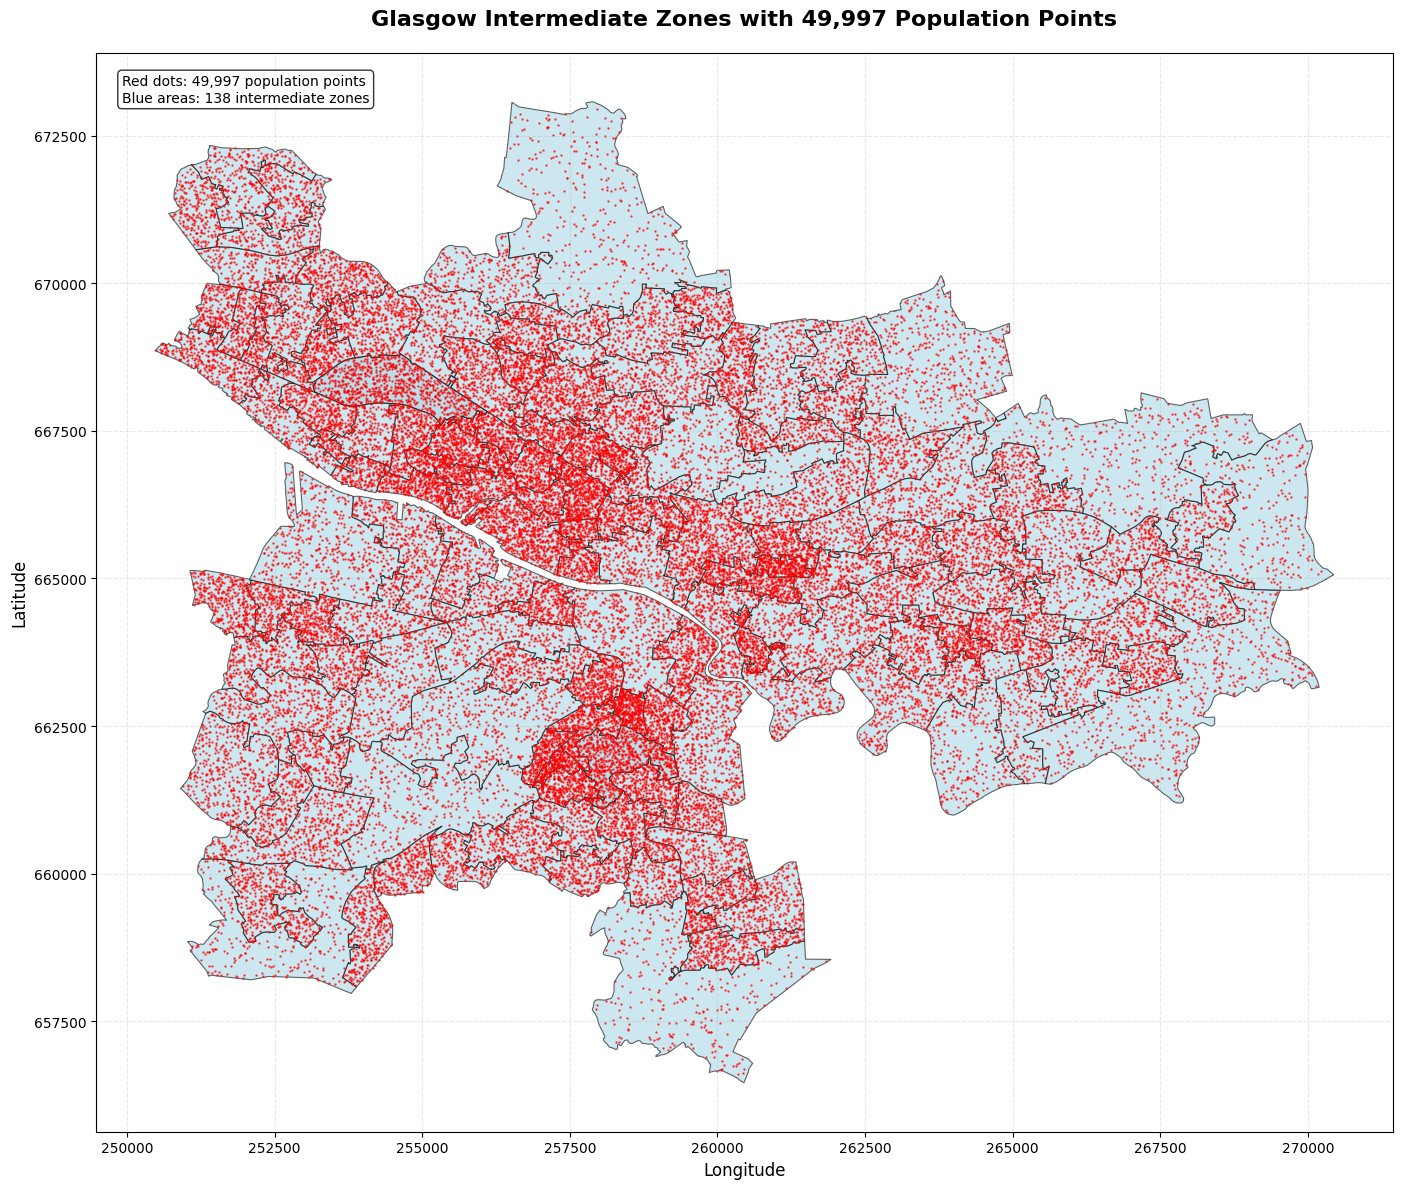

✅ First map complete! Generated 49,997 points across all zones


In [20]:
# Generate random points uniformly distributed within each intermediate zone
import random
from shapely.geometry import Point
from shapely import affinity
import matplotlib.pyplot as plt

print("🎯 Generating random points within intermediate zones...")
print("=" * 55)

if 'gdf_processed' in locals():
    # Initialize list to store all points
    all_points = []
    zone_info = []
    
    # Set random seed for reproducibility
    random.seed(42)
    np.random.seed(42)
    
    print(f"📍 Processing {len(gdf_processed)} zones...")
    
    # Generate points for each zone
    for idx, row in gdf_processed.iterrows():
        zone_name = row.get('name', f'Zone_{idx}')
        num_points = int(row['num_points'])
        geometry = row['geometry']
        
        # Get bounding box of the polygon
        minx, miny, maxx, maxy = geometry.bounds
        
        # Generate random points within the polygon
        points_generated = 0
        attempts = 0
        max_attempts = num_points * 50  # Prevent infinite loops
        
        while points_generated < num_points and attempts < max_attempts:
            # Generate random coordinates within bounding box
            x = random.uniform(minx, maxx)
            y = random.uniform(miny, maxy)
            point = Point(x, y)
            
            # Check if point is within the polygon
            if geometry.contains(point):
                all_points.append({
                    'geometry': point,
                    'zone_name': zone_name,
                    'zone_idx': idx,
                    'x': x,
                    'y': y
                })
                points_generated += 1
            
            attempts += 1
        
        # Store zone info
        zone_info.append({
            'zone_name': zone_name,
            'requested_points': num_points,
            'generated_points': points_generated,
            'attempts': attempts
        })
        
        if idx % 20 == 0:  # Progress update every 20 zones
            print(f"   Processed {idx + 1}/{len(gdf_processed)} zones...")
    
    # Convert to GeoDataFrame
    points_gdf = gpd.GeoDataFrame(all_points)
    
    # Summary statistics
    total_points_generated = len(points_gdf)
    total_points_requested = gdf_processed['num_points'].sum()
    
    print(f"\n📊 Point Generation Summary:")
    print(f"   - Total points requested: {total_points_requested:,}")
    print(f"   - Total points generated: {total_points_generated:,}")
    print(f"   - Success rate: {(total_points_generated/total_points_requested)*100:.1f}%")
    
    # Check for zones with low success rate
    zone_df = pd.DataFrame(zone_info)
    zone_df['success_rate'] = zone_df['generated_points'] / zone_df['requested_points']
    low_success = zone_df[zone_df['success_rate'] < 0.8]
    
    if len(low_success) > 0:
        print(f"   - Zones with <80% success: {len(low_success)}")
        print("     (This might indicate complex polygon shapes)")
    
    print(f"\n🗺️ Creating visualization with all {total_points_generated:,} points...")
    
    # Create the visualization
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))
    
    # Plot the zones
    gdf_processed.plot(
        ax=ax,
        color='lightblue',
        edgecolor='black',
        linewidth=0.8,
        alpha=0.6
    )
    
    # Plot all generated points
    points_gdf.plot(
        ax=ax,
        color='red',
        markersize=0.5,
        alpha=0.7
    )
    
    # Customize the plot
    ax.set_title(f'Glasgow Intermediate Zones with {total_points_generated:,} Population Points', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add legend
    ax.text(0.02, 0.98, 
            f'Red dots: {total_points_generated:,} population points\nBlue areas: {len(gdf_processed)} intermediate zones', 
            transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            verticalalignment='top', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ First map complete! Generated {total_points_generated:,} points across all zones")
    
else:
    print("❌ Run the previous cells first to create 'gdf_processed'")

🎲 Creating visualization with random sample of 30,000 points...
📍 Sampled 30,000 points from 49,997 total points


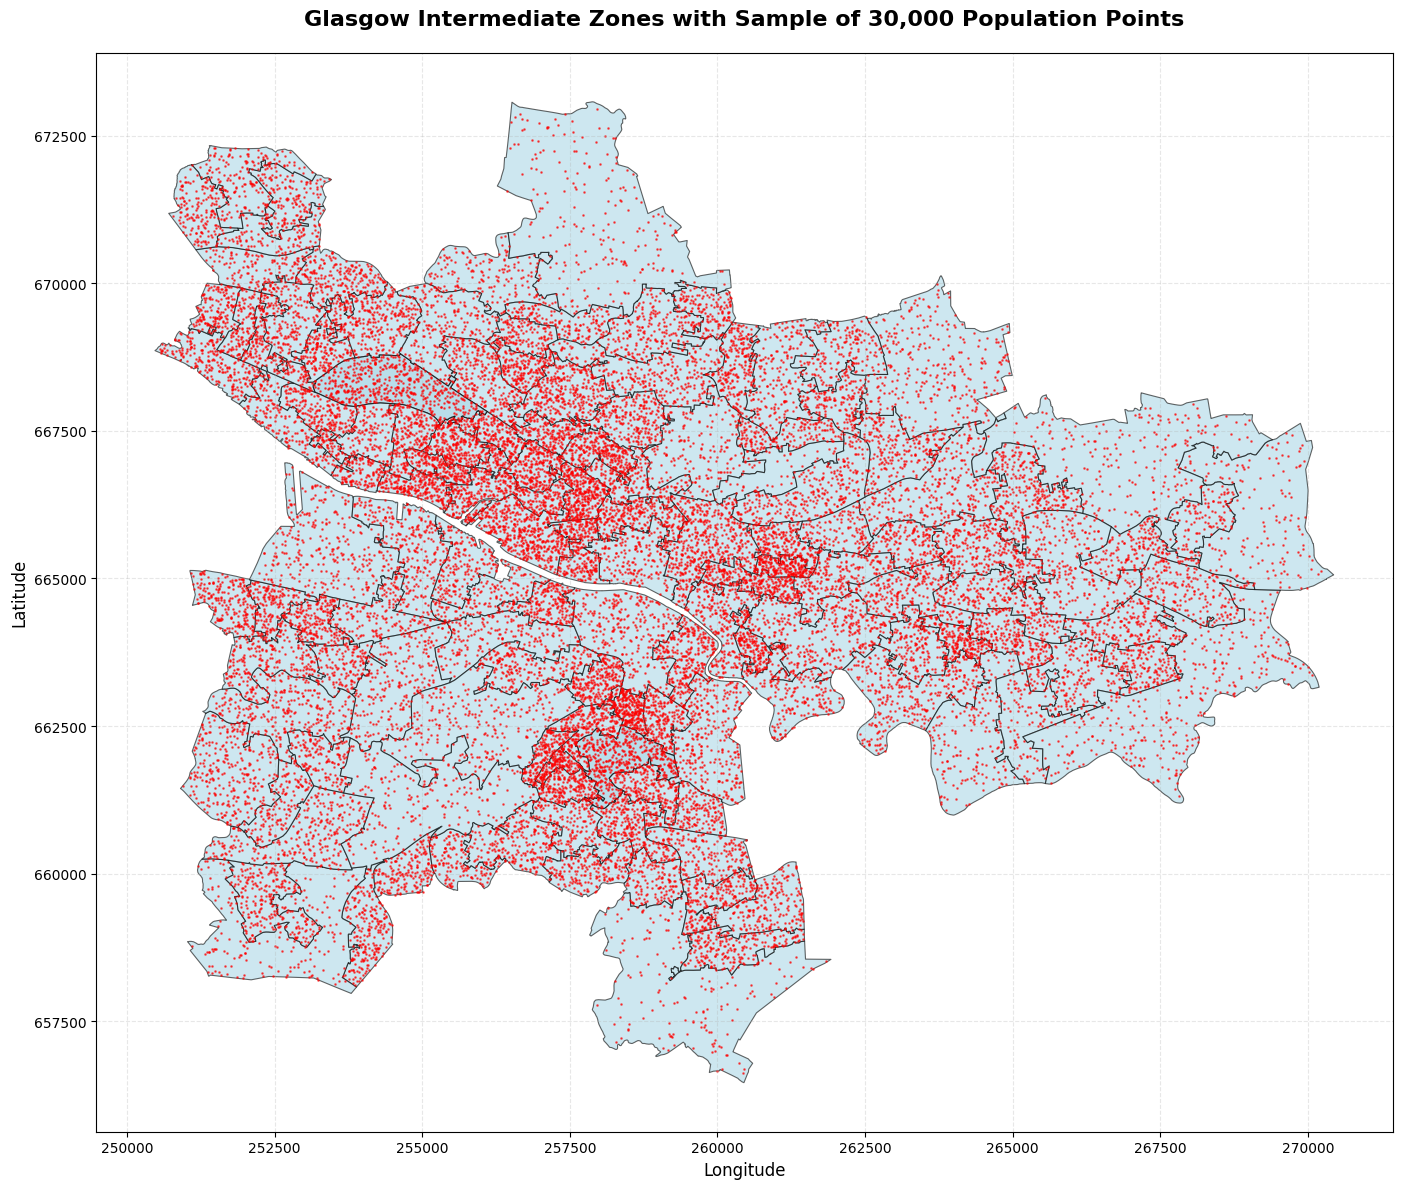


📈 Sample Distribution Analysis (30K points):
   Top 15 zones in large sample:
   - Kelvinside and Jordanhill: 518 points (58% of zone's 888 points)
   - Finnieston and Kelvinhaugh: 506 points (62% of zone's 816 points)
   - City Centre East: 486 points (60% of zone's 814 points)
   - Battlefield: 457 points (58% of zone's 788 points)
   - Hillhead: 394 points (61% of zone's 646 points)
   - Woodlands: 362 points (63% of zone's 574 points)
   - Parkhead West and Barrowfield: 353 points (61% of zone's 580 points)
   - Ruchill: 343 points (60% of zone's 575 points)
   - Baillieston East: 317 points (57% of zone's 553 points)
   - Cranhill, Lightburn and Queenslie South: 312 points (61% of zone's 509 points)
   - Anniesland West: 308 points (59% of zone's 519 points)
   - Robroyston and Millerston: 307 points (62% of zone's 493 points)
   - Gallowgate North and Bellgrove: 305 points (62% of zone's 493 points)
   - Toryglen and Oatlands: 303 points (57% of zone's 529 points)
   - Kelvingro

In [30]:
# Create a visualization with a random sample of 30,000 points
print("🎲 Creating visualization with random sample of 30,000 points...")
print("=" * 60)

if 'points_gdf' in locals() and len(points_gdf) > 0:
    # Sample 30,000 random points (or all points if less than 30,000)
    sample_size = min(30000, len(points_gdf))
    large_sample_points = points_gdf.sample(n=sample_size, random_state=123)
    
    print(f"📍 Sampled {sample_size:,} points from {len(points_gdf):,} total points")
    
    # Create the visualization
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))

    gdf_processed.plot(
        ax=ax,
        color='lightblue',
        edgecolor='black',
        linewidth=0.8,
        alpha=0.6
    )

    
    # Plot sampled points with small markers for high density visualization
    large_sample_points.plot(
        ax=ax,
        color='red',
        markersize=0.8,
        alpha=0.6
    )
    
    # Customize the plot
    ax.set_title(f'Glasgow Intermediate Zones with Sample of {sample_size:,} Population Points', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add legend and statistics
    avg_points_per_zone = len(points_gdf) / len(gdf_processed)
    sample_density = (sample_size / len(points_gdf)) * 100
    
   # legend_text = (f'Sample: {sample_size:,} points ({sample_density:.0f}% of total)\n'
   #               f'Total generated: {len(points_gdf):,} points\n'
   #               f'Average per zone: {avg_points_per_zone:.0f} points\n'
   #               f'Zones: {len(gdf_processed)} intermediate zones')
    
    # ax.text(0.02, 0.98, legend_text,
    #         transform=ax.transAxes, 
    #         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
    #         verticalalignment='top', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Show detailed sample distribution by zone
    print(f"\n📈 Sample Distribution Analysis (30K points):")
    sample_by_zone = large_sample_points['zone_name'].value_counts().head(15)
    print(f"   Top 15 zones in large sample:")
    for zone, count in sample_by_zone.items():
        original_count = len(points_gdf[points_gdf['zone_name'] == zone])
        sample_rate = (count / original_count) * 100
        print(f"   - {zone}: {count} points ({sample_rate:.0f}% of zone's {original_count} points)")
    
    # Compare sample density across different population levels
    print(f"\n📊 Sample Density by Zone Population:")
    zone_sample_stats = []
    for zone in gdf_processed['name'].unique():
        zone_data = points_gdf[points_gdf['zone_name'] == zone]
        zone_sample = large_sample_points[large_sample_points['zone_name'] == zone]
        if len(zone_data) > 0:
            zone_sample_stats.append({
                'zone': zone,
                'total_points': len(zone_data),
                'sampled_points': len(zone_sample),
                'sample_rate': (len(zone_sample) / len(zone_data)) * 100
            })
    
    zone_stats_df = pd.DataFrame(zone_sample_stats)
    zone_stats_df = zone_stats_df.sort_values('total_points', ascending=False)
    
    print(f"   - High population zones (>300 points): avg {zone_stats_df[zone_stats_df['total_points'] > 300]['sample_rate'].mean():.0f}% sampled")
    print(f"   - Medium population zones (100-300 points): avg {zone_stats_df[(zone_stats_df['total_points'] >= 100) & (zone_stats_df['total_points'] <= 300)]['sample_rate'].mean():.0f}% sampled") 
    print(f"   - Low population zones (<100 points): avg {zone_stats_df[zone_stats_df['total_points'] < 100]['sample_rate'].mean():.0f}% sampled")
    
    print(f"\n✅ Large sample map complete! Showing {sample_size:,} randomly sampled points")
    
    # Store the large sampled points for potential future use
    large_sampled_points_gdf = large_sample_points.copy()
    print(f"💾 Large sample stored as 'large_sampled_points_gdf'")
    
else:
    print("❌ Run the previous cell first to generate points")

🏥 Identifying hospitals and creating comprehensive visualization...
🔍 Identifying hospital zones...
📊 Hospital Analysis:
   - Total zones: 138
   - Zones with hospitals: 6
   - Percentage with hospitals: 4.3%

🏥 Hospital zones identified:
   1. City Centre East -> Glasgow Royal Infirmary: 6964 avg attendances
   2. Drumoyne and Shieldhall -> Queen Elizabeth University Hospital: 6158 avg attendances
   3. Battlefield -> New Victoria Hospital: 5210 avg attendances
   4. Battlefield -> New Victoria Hospital: 2148 avg attendances
   5. Kelvinside and Jordanhill -> Gartnavel Royal Hospital
   6. Kelvinside and Jordanhill -> Beatson West of Scotland Cancer Centre

📍 Calculating hospital centroid locations...

🗺️ Creating comprehensive map with 30,000 points and 6 hospitals...


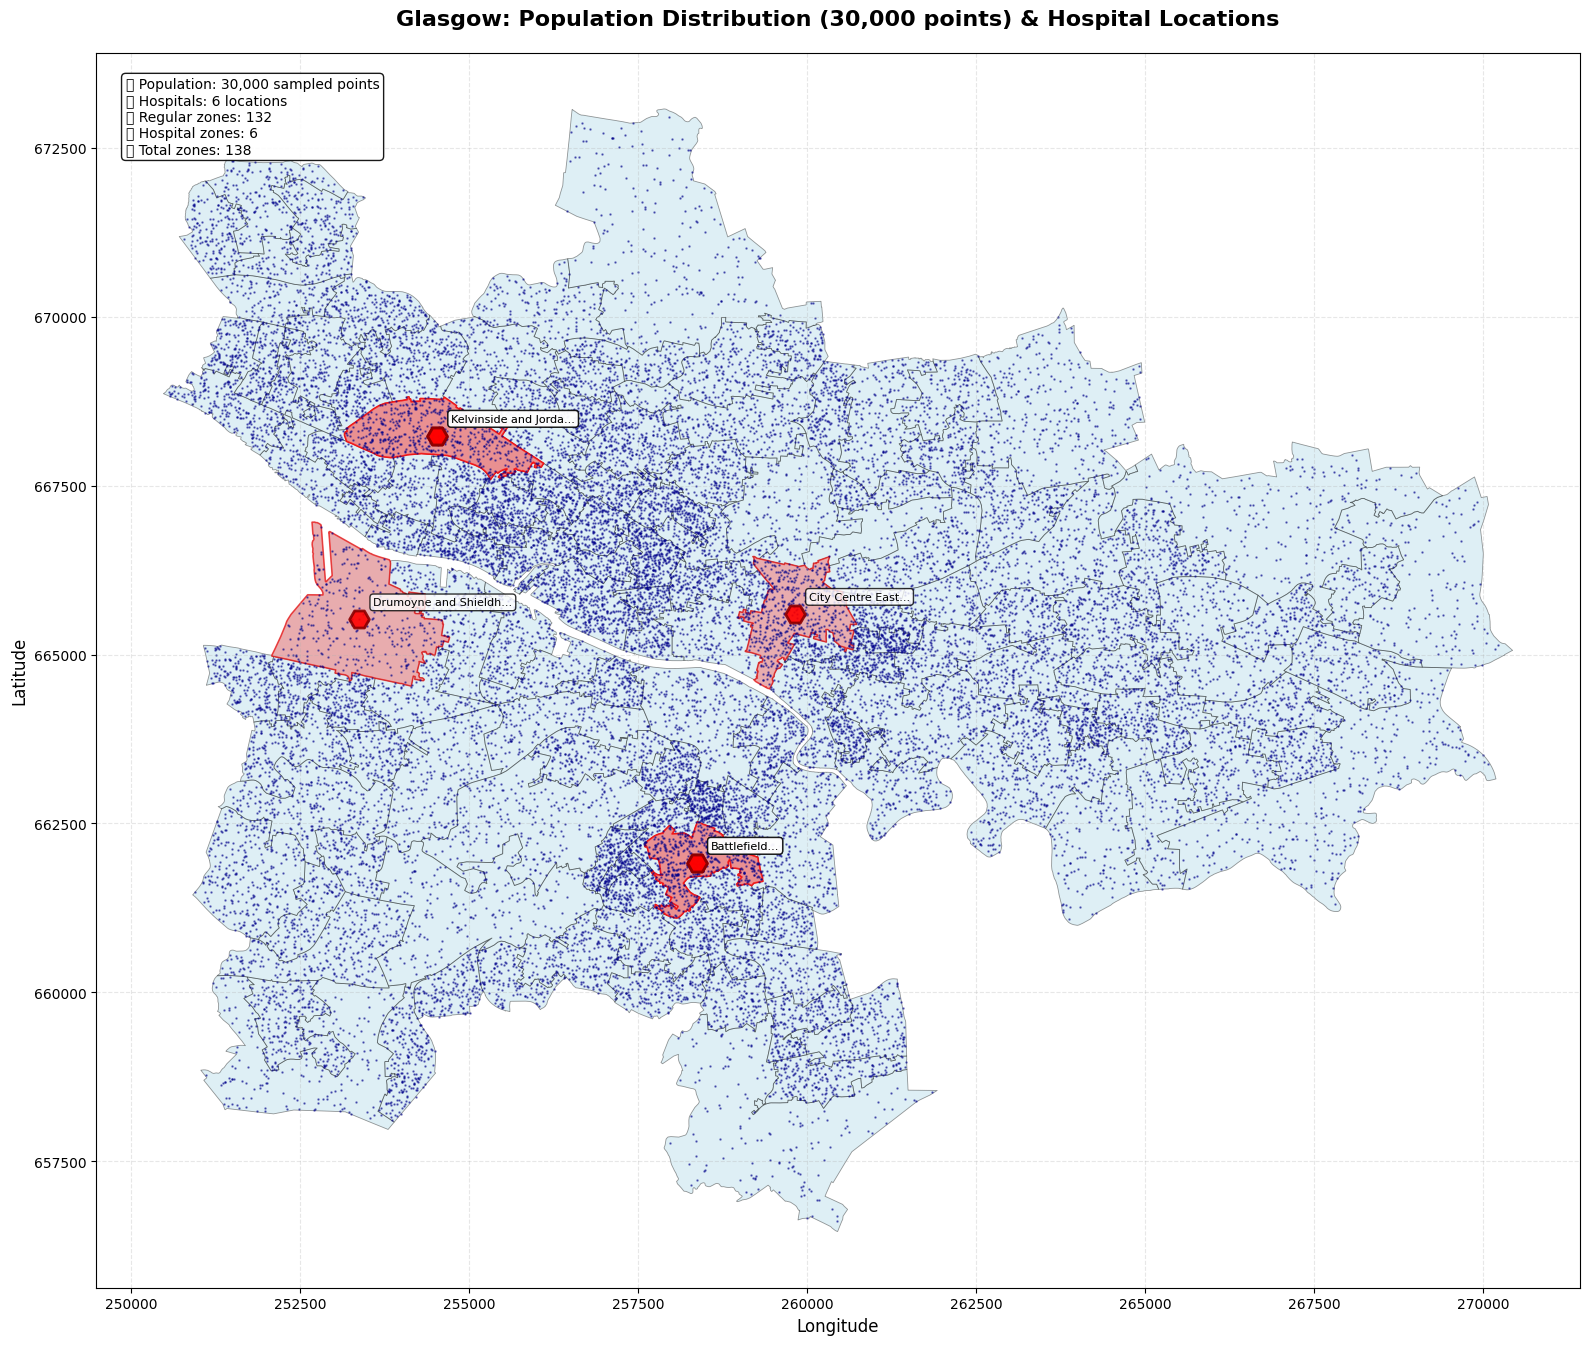


📈 Hospital Statistics:
   - Total hospitals found: 6
   - Unique hospital names: 5
   - Hospital names:
     1. Queen Elizabeth University Hospital
     2. New Victoria Hospital
     3. Glasgow Royal Infirmary
     4. Gartnavel Royal Hospital
     5. Beatson West of Scotland Cancer Centre

   📊 Attendance Statistics (for zones with attendance data):
   - Zones with attendance data: 4/6
   - Average attendances per hospital: 5120
   - Median attendances: 5684
   - Highest attendance: 6964
   - Lowest attendance: 2148

📍 Population-Hospital Distribution:
   Hospital zones by attendance & population:
   - City Centre East (Glasgow Royal Infirmary): 6964 attendances, 486 population points
   - Drumoyne and Shieldhall (Queen Elizabeth University Hospital): 6158 attendances, 299 population points
   - Battlefield (New Victoria Hospital): 5210 attendances, 457 population points
   - Battlefield (New Victoria Hospital): 2148 attendances, 457 population points
   - Kelvinside and Jordanhill (G

In [42]:
# Identify hospitals and create visualization with population points and hospital locations
print("🏥 Identifying hospitals and creating comprehensive visualization...")
print("=" * 65)

if 'large_sampled_points_gdf' in locals() and 'gdf_processed' in locals():
    
    # Identify hospital zones (where hospitalname is not NaN)
    print("🔍 Identifying hospital zones...")
    hospital_zones = gdf_processed[gdf_processed['hospitalname'].notna()].copy()
    
    print(f"📊 Hospital Analysis:")
    print(f"   - Total zones: {len(gdf_processed)}")
    print(f"   - Zones with hospitals: {len(hospital_zones)}")
    print(f"   - Percentage with hospitals: {(len(hospital_zones)/len(gdf_processed))*100:.1f}%")
    
    # Show hospital zones details
    if len(hospital_zones) > 0:
        print(f"\n🏥 Hospital zones identified:")
        # Create hospital info with name and hospital name
        hospital_info = hospital_zones[['name', 'hospitalname']].copy()
        
        # Add attendance data if available
        if 'avg_numberofattendancesall' in hospital_zones.columns:
            hospital_info['avg_attendances'] = hospital_zones['avg_numberofattendancesall']
            # Sort by attendances if available, otherwise by hospital name
            hospital_info = hospital_info.sort_values('avg_attendances', ascending=False, na_position='last')
        else:
            hospital_info = hospital_info.sort_values('hospitalname')
        
        for idx, (_, row) in enumerate(hospital_info.iterrows()):
            hospital_name = row['hospitalname']
            zone_name = row['name']
            if 'avg_attendances' in row and pd.notna(row['avg_attendances']):
                print(f"   {idx+1}. {zone_name} -> {hospital_name}: {row['avg_attendances']:.0f} avg attendances")
            else:
                print(f"   {idx+1}. {zone_name} -> {hospital_name}")
        
        # Calculate centroids for hospital locations
        print(f"\n📍 Calculating hospital centroid locations...")
        hospital_zones['centroid'] = hospital_zones.geometry.centroid
        hospital_zones['centroid_x'] = hospital_zones.centroid.x
        hospital_zones['centroid_y'] = hospital_zones.centroid.y
        
        # Create the comprehensive visualization
        print(f"\n🗺️ Creating comprehensive map with {len(large_sampled_points_gdf):,} points and {len(hospital_zones)} hospitals...")
        
        fig, ax = plt.subplots(1, 1, figsize=(16, 14))
        
        # Plot all intermediate zones
        gdf_processed.plot(
            ax=ax,
            color='lightblue',
            edgecolor='black',
            linewidth=0.6,
            alpha=0.4
        )
        
        # Highlight hospital zones with different color
        hospital_zones.plot(
            ax=ax,
            color='lightcoral',
            edgecolor='red',
            linewidth=1.2,
            alpha=0.6
        )
        
        # Plot population points
        large_sampled_points_gdf.plot(
            ax=ax,
            color='darkblue',
            markersize=0.6,
            alpha=0.5
        )
        
        # Plot hospital locations as larger markers
        ax.scatter(
            hospital_zones['centroid_x'], 
            hospital_zones['centroid_y'],
            c='red', 
            s=200,  # Large size for visibility
            marker='H',  # Hospital marker shape
            edgecolors='darkred',
            linewidth=2,
            alpha=0.9,
            zorder=10,  # Ensure hospitals are on top
            label='Hospitals'
        )
        
        # Add hospital labels
        for idx, row in hospital_zones.iterrows():
            ax.annotate(
                f"{row['name'][:20]}...", # Truncate long names
                (row['centroid_x'], row['centroid_y']),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=8,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                ha='left'
            )
        
        # Customize the plot
        ax.set_title(f'Glasgow: Population Distribution ({len(large_sampled_points_gdf):,} points) & Hospital Locations', 
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Longitude', fontsize=12)
        ax.set_ylabel('Latitude', fontsize=12)
        ax.grid(True, alpha=0.3, linestyle='--')
        
        # Create comprehensive legend
        legend_text = (f'🔵 Population: {len(large_sampled_points_gdf):,} sampled points\n'
                      f'🏥 Hospitals: {len(hospital_zones)} locations\n'
                      f'🟦 Regular zones: {len(gdf_processed) - len(hospital_zones)}\n'
                      f'🟨 Hospital zones: {len(hospital_zones)}\n'
                      f'📊 Total zones: {len(gdf_processed)}')
        
        ax.text(0.02, 0.98, legend_text,
                transform=ax.transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
                verticalalignment='top', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Additional hospital statistics
        print(f"\n📈 Hospital Statistics:")
        print(f"   - Total hospitals found: {len(hospital_zones)}")
        
        # Show unique hospital names
        unique_hospitals = hospital_zones['hospitalname'].unique()
        print(f"   - Unique hospital names: {len(unique_hospitals)}")
        print(f"   - Hospital names:")
        for i, hospital in enumerate(unique_hospitals):
            print(f"     {i+1}. {hospital}")
        
        # Show attendance statistics if available
        if 'avg_numberofattendancesall' in hospital_zones.columns:
            attendance_data = hospital_zones['avg_numberofattendancesall'].dropna()
            if len(attendance_data) > 0:
                print(f"\n   📊 Attendance Statistics (for zones with attendance data):")
                print(f"   - Zones with attendance data: {len(attendance_data)}/{len(hospital_zones)}")
                avg_attendances = attendance_data.describe()
                print(f"   - Average attendances per hospital: {avg_attendances['mean']:.0f}")
                print(f"   - Median attendances: {avg_attendances['50%']:.0f}")
                print(f"   - Highest attendance: {avg_attendances['max']:.0f}")
                print(f"   - Lowest attendance: {avg_attendances['min']:.0f}")
            else:
                print(f"   - No attendance data available for hospital zones")
        else:
            print(f"   - No attendance data column found")
        
        # Check population coverage around hospitals
        print(f"\n📍 Population-Hospital Distribution:")
        hospital_pop_data = []
        for idx, hospital_row in hospital_zones.iterrows():
            zone_name = hospital_row['name']
            hospital_name = hospital_row['hospitalname']
            zone_points = large_sampled_points_gdf[large_sampled_points_gdf['zone_name'] == zone_name]
            
            pop_data = {
                'hospital_zone': zone_name,
                'hospital_name': hospital_name,
                'population_points': len(zone_points)
            }
            
            # Add attendance data if available
            if 'avg_numberofattendancesall' in hospital_row and pd.notna(hospital_row['avg_numberofattendancesall']):
                pop_data['attendances'] = hospital_row['avg_numberofattendancesall']
            else:
                pop_data['attendances'] = None
                
            hospital_pop_data.append(pop_data)
        
        hospital_pop_df = pd.DataFrame(hospital_pop_data)
        
        # Sort by attendances if available, otherwise by population points
        if hospital_pop_df['attendances'].notna().any():
            hospital_pop_df = hospital_pop_df.sort_values('attendances', ascending=False, na_position='last')
        else:
            hospital_pop_df = hospital_pop_df.sort_values('population_points', ascending=False)
        
        print(f"   Hospital zones by attendance & population:")
        for _, row in hospital_pop_df.iterrows():
            if row['attendances'] is not None:
                print(f"   - {row['hospital_zone']} ({row['hospital_name']}): {row['attendances']:.0f} attendances, {row['population_points']} population points")
            else:
                print(f"   - {row['hospital_zone']} ({row['hospital_name']}): No attendance data, {row['population_points']} population points")
        
        print(f"\n✅ Comprehensive map complete! Showing population distribution with hospital locations")
        
    else:
        print("❌ No hospital zones found (no zones with avg_numberofattendancesall data)")
        
else:
    print("❌ Run previous cells first to generate the 30K point sample and processed data")

In [43]:
# Determine optimal location for a new hospital using probabilistic assignment
print("🏥 Determining optimal location for a new hospital...")
print("=" * 65)

if 'large_sampled_points_gdf' in locals() and 'gdf_processed' in locals():
    import numpy as np
    from scipy.spatial.distance import cdist
    
    # Step 1: Problem definition
    print("📊 Step 1: Problem definition")
    
    # Get existing hospitals
    hospital_zones = gdf_processed[gdf_processed['hospitalname'].notna()].copy()
    M = len(hospital_zones)
    
    print(f"   - Number of simulated points (N): {len(large_sampled_points_gdf):,}")
    print(f"   - Number of existing hospitals (M): {M}")
    
    # Calculate hospital centroids and attendance values
    hospital_data = []
    for idx, hospital_row in hospital_zones.iterrows():
        centroid = hospital_row.geometry.centroid
        attendance = hospital_row.get('avg_numberofattendancesall', np.nan)
        
        hospital_data.append({
            'name': hospital_row['name'],
            'hospital_name': hospital_row['hospitalname'],
            'centroid_x': centroid.x,
            'centroid_y': centroid.y,
            'attendance': attendance
        })
    
    hospital_df = pd.DataFrame(hospital_data)
    
    # Calculate mean attendance for missing values
    valid_attendances = hospital_df['attendance'].dropna()
    mean_attendance = valid_attendances.mean() if len(valid_attendances) > 0 else 1000.0
    
    # Fill missing attendance values with mean
    hospital_df['attendance_filled'] = hospital_df['attendance'].fillna(mean_attendance)
    
    print(f"   - Valid attendance data: {len(valid_attendances)}/{M}")
    print(f"   - Mean attendance (Ā): {mean_attendance:.0f}")
    
    print(f"\n🏥 Existing hospitals:")
    for idx, row in hospital_df.iterrows():
        attendance_str = f"{row['attendance']:.0f}" if pd.notna(row['attendance']) else f"{mean_attendance:.0f} (avg)"
        print(f"   {idx+1}. {row['name']} -> {row['hospital_name']}: {attendance_str} attendances")
    
    # Step 2: Prepare point coordinates
    print(f"\n📍 Step 2: Preparing point coordinates")
    
    # Extract point coordinates
    point_coords = np.array([[point.x, point.y] for point in large_sampled_points_gdf.geometry])
    hospital_coords = hospital_df[['centroid_x', 'centroid_y']].values
    
    print(f"   - Point coordinates shape: {point_coords.shape}")
    print(f"   - Hospital coordinates shape: {hospital_coords.shape}")
    
    # Step 3: Calculate distances and probabilistic assignment function
    def calculate_assignment_probabilities(points, hospitals, attendances, epsilon=1e-6):
        """Calculate probabilistic assignment of points to hospitals"""
        # Calculate distances (N x M matrix)
        distances = cdist(points, hospitals, metric='euclidean')
        
        # Calculate preliminary weights: A_j / (d_ij + epsilon)
        # Broadcasting: attendances is (M,) and distances is (N,M)
        weights = attendances[np.newaxis, :] / (distances + epsilon)
        
        # Normalize to get probabilities (each row sums to 1)
        probabilities = weights / weights.sum(axis=1, keepdims=True)
        
        return probabilities, distances
    
    # Step 4: Evaluate all candidate zones
    print(f"\n🎯 Step 3-5: Evaluating all candidate zones for new hospital...")
    
    # Get all zone centroids as candidate locations
    candidate_zones = []
    candidate_coords = []
    
    for idx, zone_row in gdf_processed.iterrows():
        centroid = zone_row.geometry.centroid
        candidate_zones.append({
            'name': zone_row['name'],
            'centroid_x': centroid.x,
            'centroid_y': centroid.y,
            'zone_idx': idx
        })
        candidate_coords.append([centroid.x, centroid.y])
    
    candidate_coords = np.array(candidate_coords)
    
    print(f"   - Candidate zones: {len(candidate_zones)}")
    print(f"   - Epsilon value: 1e-6")
    
    # Evaluate each candidate location
    results = []
    
    # Set random seed for reproducible simulations
    np.random.seed(42)
    
    print(f"   - Simulating patient assignments...")
    
    for i, candidate in enumerate(candidate_zones):
        if (i + 1) % 20 == 0:
            print(f"     Processed {i+1}/{len(candidate_zones)} candidates...")
        
        # Create extended hospital list with new hospital
        extended_hospitals = np.vstack([hospital_coords, [[candidate['centroid_x'], candidate['centroid_y']]]])
        extended_attendances = np.append(hospital_df['attendance_filled'].values, mean_attendance)
        
        # Calculate probabilities with new hospital
        probabilities, distances = calculate_assignment_probabilities(
            point_coords, extended_hospitals, extended_attendances
        )
        
        # Simulate assignment (choose hospital for each point based on probabilities)
        # Use vectorized random choice for efficiency
        assignments = np.array([
            np.random.choice(len(extended_hospitals), p=prob_row) 
            for prob_row in probabilities
        ])
        
        # Count assignments to new hospital (index M)
        new_hospital_assignments = np.sum(assignments == M)
        
        # Calculate average probability of assignment to new hospital
        avg_prob_new_hospital = probabilities[:, M].mean()
        
        results.append({
            'zone_name': candidate['name'],
            'centroid_x': candidate['centroid_x'],
            'centroid_y': candidate['centroid_y'],
            'patients_attracted': new_hospital_assignments,
            'avg_probability': avg_prob_new_hospital,
            'zone_idx': candidate['zone_idx']
        })
    
    # Convert results to DataFrame and sort
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('patients_attracted', ascending=False)
    
    # Find optimal location
    optimal_zone = results_df.iloc[0]
    
    print(f"\n🏆 Optimal Hospital Location Found!")
    print(f"   - Zone: {optimal_zone['zone_name']}")
    print(f"   - Expected patients attracted: {optimal_zone['patients_attracted']:,}")
    print(f"   - Average assignment probability: {optimal_zone['avg_probability']:.3f}")
    print(f"   - Percentage of total patients: {(optimal_zone['patients_attracted']/len(large_sampled_points_gdf))*100:.1f}%")
    
    print(f"\n📊 Top 10 candidate locations:")
    print("Rank | Zone Name | Patients | Avg Prob | % of Total")
    print("-" * 60)
    for idx, row in results_df.head(10).iterrows():
        percentage = (row['patients_attracted']/len(large_sampled_points_gdf))*100
        print(f"{results_df.index.get_loc(idx)+1:2d}   | {row['zone_name'][:20]:20s} | {row['patients_attracted']:4d}     | {row['avg_probability']:.3f}    | {percentage:5.1f}%")
    
    # Store results for visualization
    optimization_results = {
        'results_df': results_df,
        'optimal_zone': optimal_zone,
        'hospital_df': hospital_df,
        'mean_attendance': mean_attendance
    }
    
    print(f"\n💾 Results stored in 'optimization_results' dictionary")
    print(f"✅ Hospital location optimization complete!")
    
else:
    print("❌ Run previous cells first to generate population points and hospital data")

🏥 Determining optimal location for a new hospital...
📊 Step 1: Problem definition
   - Number of simulated points (N): 30,000
   - Number of existing hospitals (M): 6
   - Valid attendance data: 4/6
   - Mean attendance (Ā): 5120

🏥 Existing hospitals:
   1. Drumoyne and Shieldhall -> Queen Elizabeth University Hospital: 6158 attendances
   2. Battlefield -> New Victoria Hospital: 5210 attendances
   3. Battlefield -> New Victoria Hospital: 2148 attendances
   4. City Centre East -> Glasgow Royal Infirmary: 6964 attendances
   5. Kelvinside and Jordanhill -> Gartnavel Royal Hospital: 5120 (avg) attendances
   6. Kelvinside and Jordanhill -> Beatson West of Scotland Cancer Centre: 5120 (avg) attendances

📍 Step 2: Preparing point coordinates
📊 Step 1: Problem definition
   - Number of simulated points (N): 30,000
   - Number of existing hospitals (M): 6
   - Valid attendance data: 4/6
   - Mean attendance (Ā): 5120

🏥 Existing hospitals:
   1. Drumoyne and Shieldhall -> Queen Elizabeth 

🗺️ Creating comprehensive visualization with hospital optimization results...
📊 Visualization Components:
   - Population points: 30,000
   - Existing hospitals: 6
   - Top candidate zones: 10
   - Optimal location: Kelvingrove and University

🎯 Highlighting top 10 candidate zones...

🎯 Highlighting top 10 candidate zones...


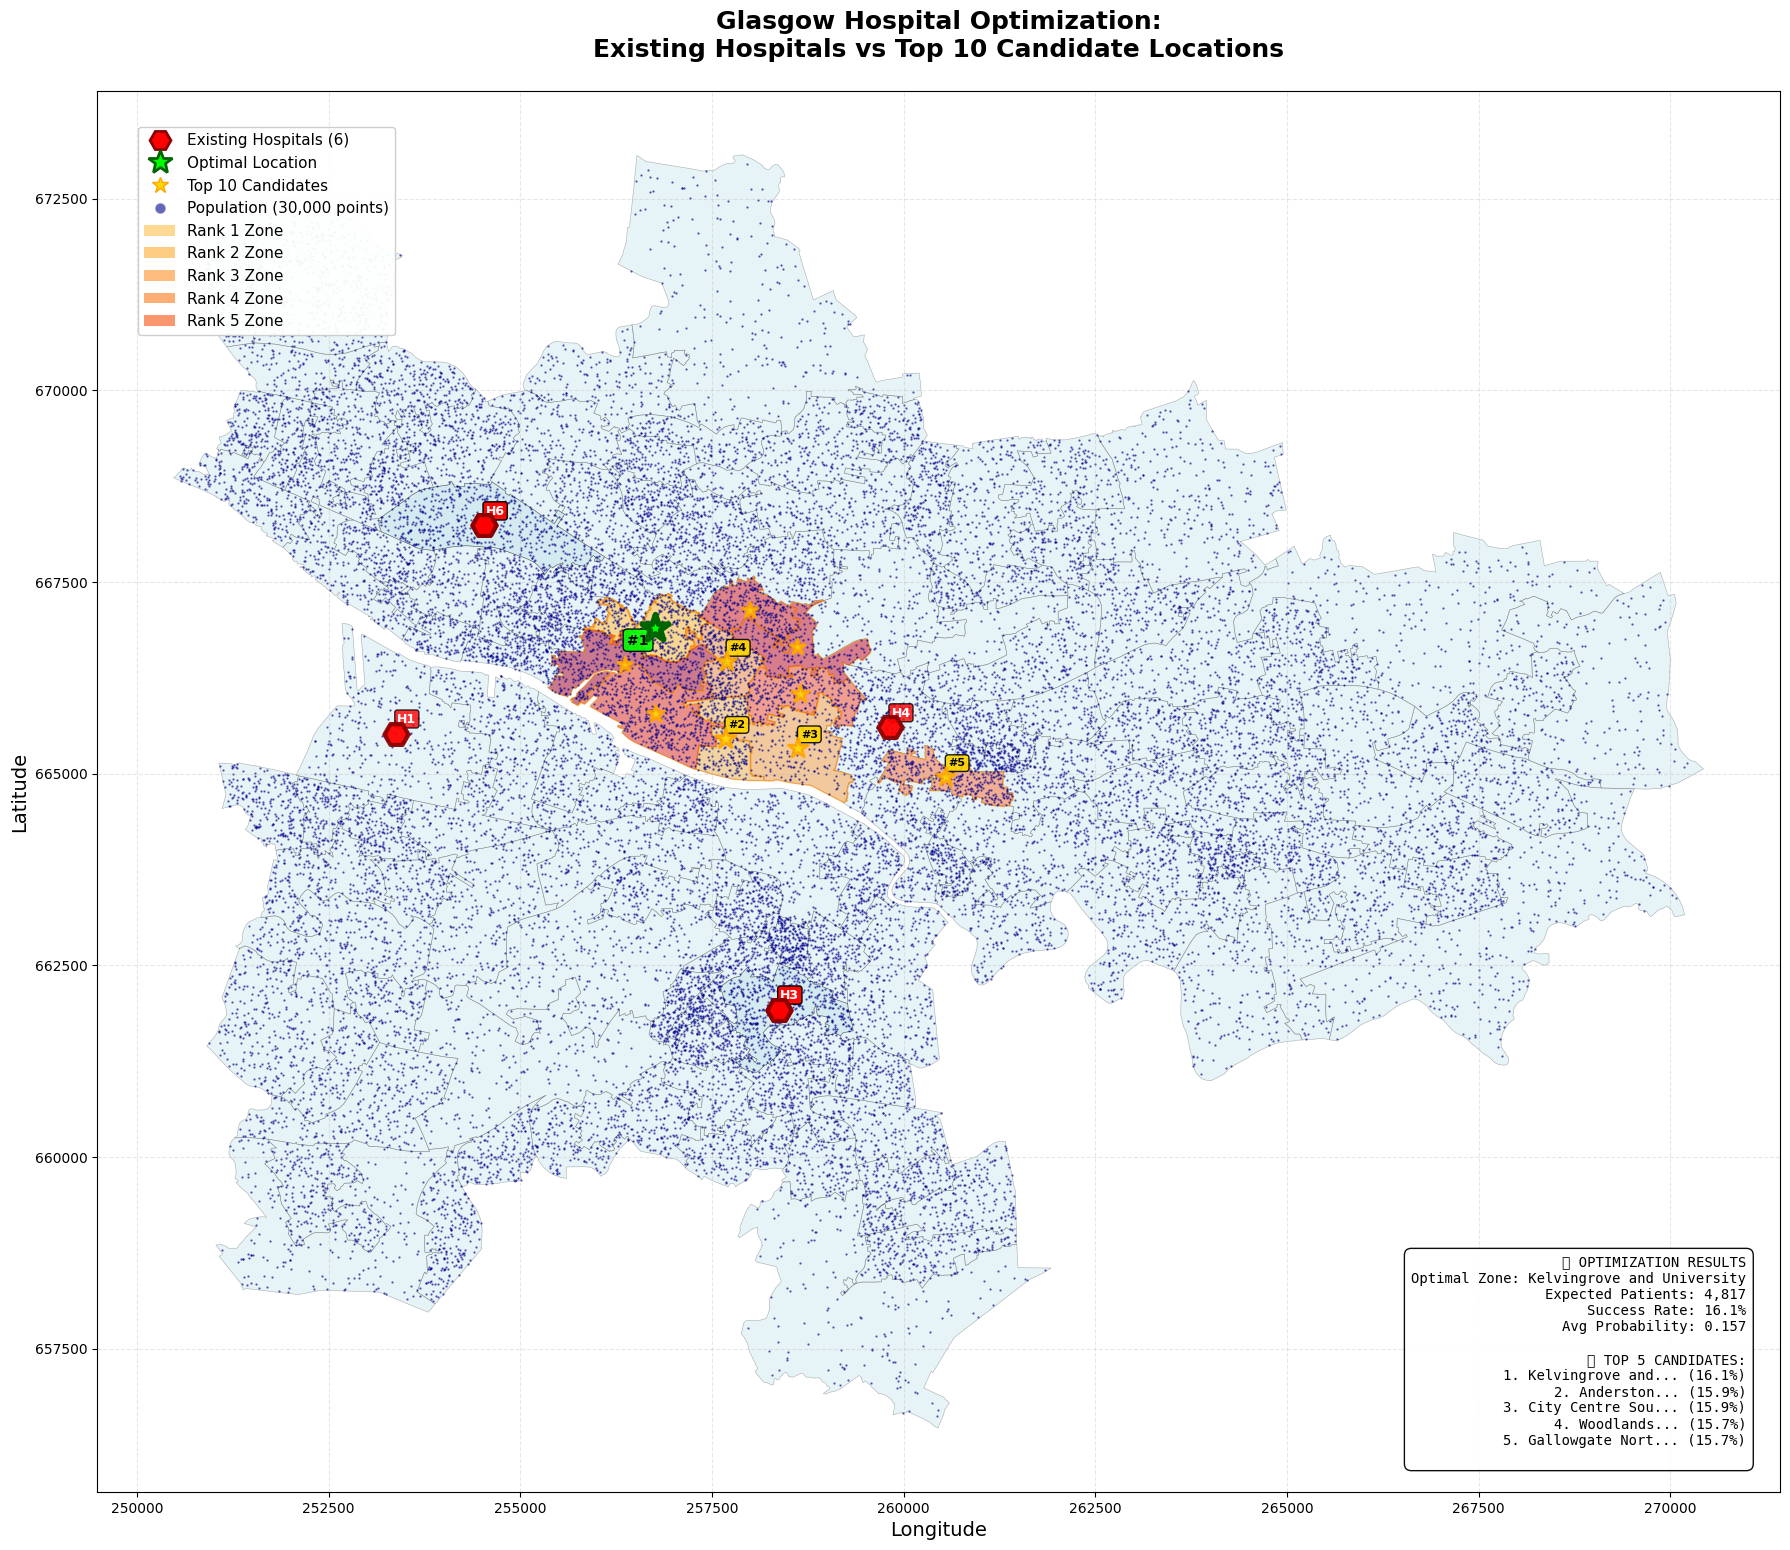


📈 Detailed Analysis Results:
🏆 OPTIMAL LOCATION: Kelvingrove and University
   - Expected patients attracted: 4,817
   - Percentage of total population: 16.1%
   - Average assignment probability: 0.1565

🏥 EXISTING HOSPITALS:
   H1. Drumoyne and Shieldhall -> Queen Elizabeth University Hospital (6158 attendances)
   H2. Battlefield -> New Victoria Hospital (5210 attendances)
   H3. Battlefield -> New Victoria Hospital (2148 attendances)
   H4. City Centre East -> Glasgow Royal Infirmary (6964 attendances)
   H5. Kelvinside and Jordanhill -> Gartnavel Royal Hospital (N/A attendances)
   H6. Kelvinside and Jordanhill -> Beatson West of Scotland Cancer Centre (N/A attendances)

🎯 TOP 10 CANDIDATE ZONES:
Rank | Zone Name                | Patients | % Total | Avg Prob
----------------------------------------------------------------------
 1   | Kelvingrove and Universi | 4817     |  16.1%  | 0.1565
 2   | Anderston                | 4777     |  15.9%  | 0.1577
 3   | City Centre South      

In [44]:
# Visualize existing hospitals, top 10 candidate zones, and population points
print("🗺️ Creating comprehensive visualization with hospital optimization results...")
print("=" * 75)

if 'optimization_results' in locals() and 'large_sampled_points_gdf' in locals() and 'gdf_processed' in locals():
    
    # Extract optimization results
    results_df = optimization_results['results_df']
    optimal_zone = optimization_results['optimal_zone']
    hospital_df = optimization_results['hospital_df']
    
    # Get top 10 candidate zones
    top_10_candidates = results_df.head(10).copy()
    
    print(f"📊 Visualization Components:")
    print(f"   - Population points: {len(large_sampled_points_gdf):,}")
    print(f"   - Existing hospitals: {len(hospital_df)}")
    print(f"   - Top candidate zones: {len(top_10_candidates)}")
    print(f"   - Optimal location: {optimal_zone['zone_name']}")
    
    # Create the comprehensive visualization
    fig, ax = plt.subplots(1, 1, figsize=(18, 16))
    
    # Plot all intermediate zones as base layer
    gdf_processed.plot(
        ax=ax,
        color='lightblue',
        edgecolor='black',
        linewidth=0.4,
        alpha=0.3
    )
    
    # Highlight top 10 candidate zones
    print(f"\n🎯 Highlighting top 10 candidate zones...")
    
    # Create a color gradient for top 10 candidates (best = darkest)
    candidate_colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, 10))
    
    for i, (_, candidate) in enumerate(top_10_candidates.iterrows()):
        # Find the zone geometry
        zone_idx = candidate['zone_idx']
        zone_geom = gdf_processed.iloc[zone_idx:zone_idx+1]
        
        # Plot candidate zone
        zone_geom.plot(
            ax=ax,
            color=candidate_colors[i],
            edgecolor='darkorange',
            linewidth=1.5 if i == 0 else 1.0,  # Thicker border for optimal
            alpha=0.7 if i == 0 else 0.5,
            label=f'Rank {i+1}' if i < 5 else None  # Only label top 5 for clarity
        )
    
    # Plot population points (with smaller markers for better performance)
    large_sampled_points_gdf.plot(
        ax=ax,
        color='darkblue',
        markersize=0.4,
        alpha=0.6
    )
    
    # Plot existing hospitals as large red markers
    ax.scatter(
        hospital_df['centroid_x'], 
        hospital_df['centroid_y'],
        c='red', 
        s=300,  # Large size
        marker='H',  # Hospital marker shape
        edgecolors='darkred',
        linewidth=3,
        alpha=0.95,
        zorder=15,  # Ensure hospitals are on top
        label='Existing Hospitals'
    )
    
    # Plot top 10 candidate hospital locations
    ax.scatter(
        top_10_candidates['centroid_x'], 
        top_10_candidates['centroid_y'],
        c='gold',
        s=[250 - i*15 for i in range(10)],  # Decreasing size by rank
        marker='*',  # Star marker for candidates
        edgecolors='orange',
        linewidth=2,
        alpha=0.9,
        zorder=12,
        label='Top 10 Candidates'
    )
    
    # Highlight the optimal location specially
    ax.scatter(
        optimal_zone['centroid_x'], 
        optimal_zone['centroid_y'],
        c='lime',
        s=400,  # Largest size
        marker='*',
        edgecolors='darkgreen',
        linewidth=4,
        alpha=1.0,
        zorder=20,  # On top of everything
        label='Optimal Location'
    )
    
    # Add labels for existing hospitals
    for idx, hospital in hospital_df.iterrows():
        ax.annotate(
            f"H{idx+1}", 
            (hospital['centroid_x'], hospital['centroid_y']),
            xytext=(8, 8),
            textcoords='offset points',
            fontsize=9,
            fontweight='bold',
            color='white',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.8),
            ha='center'
        )
    
    # Add labels for top 5 candidates
    for i, (_, candidate) in enumerate(top_10_candidates.head(5).iterrows()):
        ax.annotate(
            f"#{i+1}", 
            (candidate['centroid_x'], candidate['centroid_y']),
            xytext=(-12, -12) if i == 0 else (8, 8),  # Offset optimal location label
            textcoords='offset points',
            fontsize=10 if i == 0 else 8,
            fontweight='bold',
            color='black',
            bbox=dict(
                boxstyle='round,pad=0.3', 
                facecolor='lime' if i == 0 else 'gold', 
                alpha=0.9
            ),
            ha='center'
        )
    
    # Customize the plot
    ax.set_title(
        f'Glasgow Hospital Optimization:\nExisting Hospitals vs Top 10 Candidate Locations', 
        fontsize=18, fontweight='bold', pad=25
    )
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Create comprehensive legend
    legend_elements = []
    
    # Add custom legend elements
    legend_elements.extend([
        plt.Line2D([0], [0], marker='H', color='w', markerfacecolor='red', 
                  markersize=15, markeredgecolor='darkred', markeredgewidth=2, 
                  label=f'Existing Hospitals ({len(hospital_df)})'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='lime', 
                  markersize=18, markeredgecolor='darkgreen', markeredgewidth=2, 
                  label=f'Optimal Location'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='gold', 
                  markersize=12, markeredgecolor='orange', markeredgewidth=1, 
                  label=f'Top 10 Candidates'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkblue', 
                  markersize=8, alpha=0.6, 
                  label=f'Population ({len(large_sampled_points_gdf):,} points)')
    ])
    
    # Add color-coded candidate zones
    for i in range(5):  # Show legend for top 5
        legend_elements.append(
            plt.Rectangle((0, 0), 1, 1, facecolor=candidate_colors[i], 
                         alpha=0.7, label=f'Rank {i+1} Zone')
        )
    
    # Create legend
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.98), 
             framealpha=0.95, fontsize=11)
    
    # Add statistics text box
    stats_text = (
        f"🏆 OPTIMIZATION RESULTS\n"
        f"Optimal Zone: {optimal_zone['zone_name']}\n"
        f"Expected Patients: {optimal_zone['patients_attracted']:,}\n"
        f"Success Rate: {(optimal_zone['patients_attracted']/len(large_sampled_points_gdf))*100:.1f}%\n"
        f"Avg Probability: {optimal_zone['avg_probability']:.3f}\n\n"
        f"📊 TOP 5 CANDIDATES:\n"
    )
    
    for i, (_, candidate) in enumerate(top_10_candidates.head(5).iterrows()):
        percentage = (candidate['patients_attracted']/len(large_sampled_points_gdf))*100
        stats_text += f"{i+1}. {candidate['zone_name'][:15]}... ({percentage:.1f}%)\n"
    
    ax.text(0.98, 0.02, stats_text, transform=ax.transAxes,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.95),
            verticalalignment='bottom', horizontalalignment='right',
            fontsize=10, fontfamily='monospace')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print(f"\n📈 Detailed Analysis Results:")
    print(f"🏆 OPTIMAL LOCATION: {optimal_zone['zone_name']}")
    print(f"   - Expected patients attracted: {optimal_zone['patients_attracted']:,}")
    print(f"   - Percentage of total population: {(optimal_zone['patients_attracted']/len(large_sampled_points_gdf))*100:.1f}%")
    print(f"   - Average assignment probability: {optimal_zone['avg_probability']:.4f}")
    
    print(f"\n🏥 EXISTING HOSPITALS:")
    for i, hospital in hospital_df.iterrows():
        attendance = f"{hospital['attendance']:.0f}" if pd.notna(hospital['attendance']) else "N/A"
        print(f"   H{i+1}. {hospital['name']} -> {hospital['hospital_name']} ({attendance} attendances)")
    
    print(f"\n🎯 TOP 10 CANDIDATE ZONES:")
    print("Rank | Zone Name                | Patients | % Total | Avg Prob")
    print("-" * 70)
    for i, (_, candidate) in enumerate(top_10_candidates.iterrows()):
        percentage = (candidate['patients_attracted']/len(large_sampled_points_gdf))*100
        print(f"{i+1:2d}   | {candidate['zone_name'][:24]:24s} | {candidate['patients_attracted']:4d}     | {percentage:5.1f}%  | {candidate['avg_probability']:.4f}")
    
    print(f"\n✅ Comprehensive hospital optimization visualization complete!")
    print(f"💡 The map shows the optimal balance between existing hospital coverage")
    print(f"    and potential new hospital locations based on population distribution.")
    
else:
    print("❌ Run the hospital optimization cell first to generate results")

🗺️ Creating simplified visualization with top 5 hospital locations...
📊 Visualization Components:
   - Population points: 30,000
   - Existing hospitals: 6
   - Top candidate locations: 5
   - Best location: Kelvingrove and University
   - Expected patients attracted: 4,817


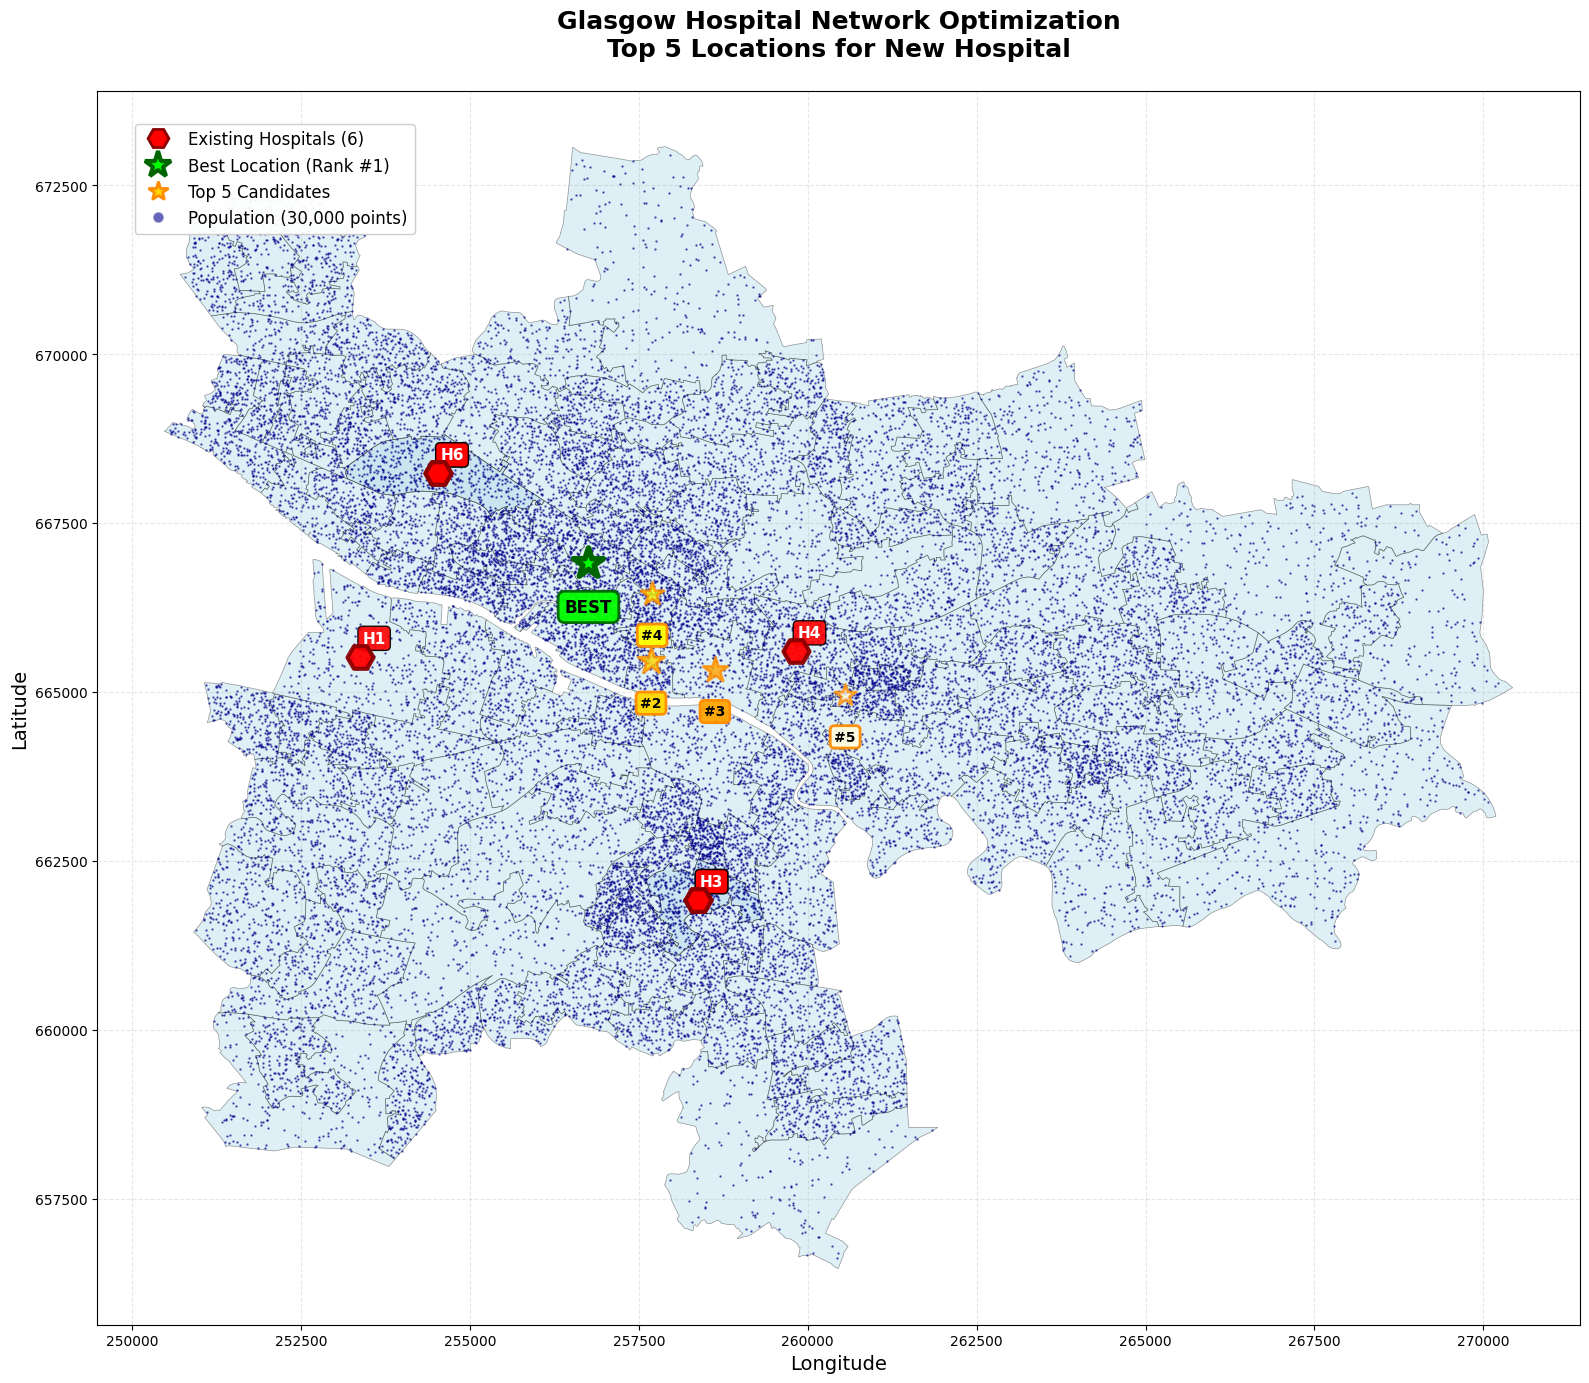


📈 TOP 5 OPTIMIZATION RESULTS:
🎯 BEST LOCATION: Kelvingrove and University
   Expected Impact:
   - Patients attracted: 4,817
   - Population coverage: 16.1%
   - Assignment probability: 0.1565

🏥 CURRENT HOSPITAL NETWORK:
   H1. Drumoyne and Shieldhall -> Queen Elizabeth University Hospital (6158 attendances)
   H2. Battlefield -> New Victoria Hospital (5210 attendances)
   H3. Battlefield -> New Victoria Hospital (2148 attendances)
   H4. City Centre East -> Glasgow Royal Infirmary (6964 attendances)
   H5. Kelvinside and Jordanhill -> Gartnavel Royal Hospital (No attendance data)
   H6. Kelvinside and Jordanhill -> Beatson West of Scotland Cancer Centre (No attendance data)

🏆 TOP 5 CANDIDATE ZONES:
Rank | Zone Name                | Patients | % Total | Avg Prob
----------------------------------------------------------------------
 1   | Kelvingrove and Universi | 4817     |  16.1%  | 0.1565
 2   | Anderston                | 4777     |  15.9%  | 0.1577
 3   | City Centre South     

In [ ]:
# Simplified visualization: existing hospitals + top 5 optimal new locations
print("🗺️ Creating simplified visualization with top 5 hospital locations...")
print("=" * 70)

if 'optimization_results' in locals() and 'large_sampled_points_gdf' in locals() and 'gdf_processed' in locals():
    
    # Extract optimization results
    results_df = optimization_results['results_df']
    optimal_zone = optimization_results['optimal_zone']
    hospital_df = optimization_results['hospital_df']
    
    # Get top 5 candidate zones instead of all
    top_5_candidates = results_df.head(5).copy()
    
    print(f"📊 Visualization Components:")
    print(f"   - Population points: {len(large_sampled_points_gdf):,}")
    print(f"   - Existing hospitals: {len(hospital_df)}")
    print(f"   - Top candidate locations: {len(top_5_candidates)}")
    print(f"   - Best location: {optimal_zone['zone_name']}")
    print(f"   - Expected patients attracted: {optimal_zone['patients_attracted']:,}")
    
    # Create the simplified visualization
    fig, ax = plt.subplots(1, 1, figsize=(16, 14))
    
    # Plot all intermediate zones as base layer (no special coloring for candidates)
    gdf_processed.plot(
        ax=ax,
        color='lightblue',
        edgecolor='black',
        linewidth=0.5,
        alpha=0.4
    )
    
    # Plot population points
    large_sampled_points_gdf.plot(
        ax=ax,
        color='darkblue',
        markersize=0.5,
        alpha=0.6
    )
    
    # Plot existing hospitals as large red markers
    ax.scatter(
        hospital_df['centroid_x'], 
        hospital_df['centroid_y'],
        c='red', 
        s=350,  # Large size
        marker='H',  # Hospital marker shape
        edgecolors='darkred',
        linewidth=3,
        alpha=0.95,
        zorder=15,  # Ensure hospitals are on top
        label='Existing Hospitals'
    )
    
    # Plot top 5 candidate hospital locations with different sizes
    candidate_sizes = [500, 400, 350, 300, 250]  # Decreasing size by rank
    candidate_colors = ['lime', 'gold', 'orange', 'yellow', 'lightyellow']
    
    for i, (_, candidate) in enumerate(top_5_candidates.iterrows()):
        ax.scatter(
            candidate['centroid_x'], 
            candidate['centroid_y'],
            c=candidate_colors[i],
            s=candidate_sizes[i],
            marker='*',
            edgecolors='darkgreen' if i == 0 else 'darkorange',
            linewidth=4 if i == 0 else 2,
            alpha=1.0 if i == 0 else 0.8,
            zorder=20 - i,  # Best candidate on top
            label=f'Rank {i+1} Candidate' if i < 3 else None  # Only label top 3
        )
    
    # Add labels for existing hospitals
    for idx, hospital in hospital_df.iterrows():
        ax.annotate(
            f"H{idx+1}", 
            (hospital['centroid_x'], hospital['centroid_y']),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=11,
            fontweight='bold',
            color='white',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.9),
            ha='center'
        )
    
    # Add labels for top 5 candidates
    for i, (_, candidate) in enumerate(top_5_candidates.iterrows()):
        label_text = "BEST" if i == 0 else f"#{i+1}"
        ax.annotate(
            label_text, 
            (candidate['centroid_x'], candidate['centroid_y']),
            xytext=(0, -25),
            textcoords='offset points',
            fontsize=12 if i == 0 else 10,
            fontweight='bold',
            color='black',
            bbox=dict(
                boxstyle='round,pad=0.4' if i == 0 else 'round,pad=0.3', 
                facecolor=candidate_colors[i], 
                edgecolor='darkgreen' if i == 0 else 'darkorange',
                linewidth=2,
                alpha=0.95
            ),
            ha='center',
            va='top'
        )
    
    # Customize the plot
    ax.set_title(
        f'Glasgow Hospital Network Optimization\nTop 5 Locations for New Hospital', 
        fontsize=18, fontweight='bold', pad=25
    )
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Create simplified legend
    legend_elements = [
        plt.Line2D([0], [0], marker='H', color='w', markerfacecolor='red', 
                  markersize=15, markeredgecolor='darkred', markeredgewidth=2, 
                  label=f'Existing Hospitals ({len(hospital_df)})'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='lime', 
                  markersize=20, markeredgecolor='darkgreen', markeredgewidth=3, 
                  label='Best Location (Rank #1)'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='gold', 
                  markersize=15, markeredgecolor='darkorange', markeredgewidth=2, 
                  label='Top 5 Candidates'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkblue', 
                  markersize=8, alpha=0.6, 
                  label=f'Population ({len(large_sampled_points_gdf):,} points)')
    ]
    
    # Create legend
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.98), 
             framealpha=0.95, fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print focused results for top 5 only
    print(f"\n📈 TOP 5 OPTIMIZATION RESULTS:")
    print(f"🎯 BEST LOCATION: {optimal_zone['zone_name']}")
    percentage = (optimal_zone['patients_attracted']/len(large_sampled_points_gdf))*100
    print(f"   Expected Impact:")
    print(f"   - Patients attracted: {optimal_zone['patients_attracted']:,}")
    print(f"   - Population coverage: {percentage:.1f}%")
    print(f"   - Assignment probability: {optimal_zone['avg_probability']:.4f}")
    
    print(f"\n🏥 CURRENT HOSPITAL NETWORK:")
    for i, hospital in hospital_df.iterrows():
        attendance = f"{hospital['attendance']:.0f} attendances" if pd.notna(hospital['attendance']) else "No attendance data"
        print(f"   H{i+1}. {hospital['name']} -> {hospital['hospital_name']} ({attendance})")
    
    print(f"\n🏆 TOP 5 CANDIDATE ZONES:")
    print("Rank | Zone Name                | Patients | % Total | Avg Prob")
    print("-" * 70)
    for i, (_, candidate) in enumerate(top_5_candidates.iterrows()):
        percentage_cand = (candidate['patients_attracted']/len(large_sampled_points_gdf))*100
        print(f"{i+1:2d}   | {candidate['zone_name'][:24]:24s} | {candidate['patients_attracted']:4d}     | {percentage_cand:5.1f}%  | {candidate['avg_probability']:.4f}")
    
    print(f"\n🔄 NETWORK IMPROVEMENT:")
    print(f"   - Current hospitals: {len(hospital_df)}")
    print(f"   - Proposed hospitals: {len(hospital_df) + 1}")
    print(f"   - Additional coverage: +{percentage:.1f}% population")
    print(f"   - Strategic benefit: Optimal location identified")
    
    print(f"\n✅ Top 5 hospital optimization visualization complete!")
    print(f"💡 This map focuses on the 5 best locations for maximum impact.")
    
else:
    print("❌ Run the hospital optimization cell first to generate results")

🗺️ Creating visualization with single optimal hospital location...
📊 Visualization Components:
   - Population points: 30,000
   - Existing hospitals: 6
   - Optimal new location: Kelvingrove and University
   - Expected patients attracted: 4,817


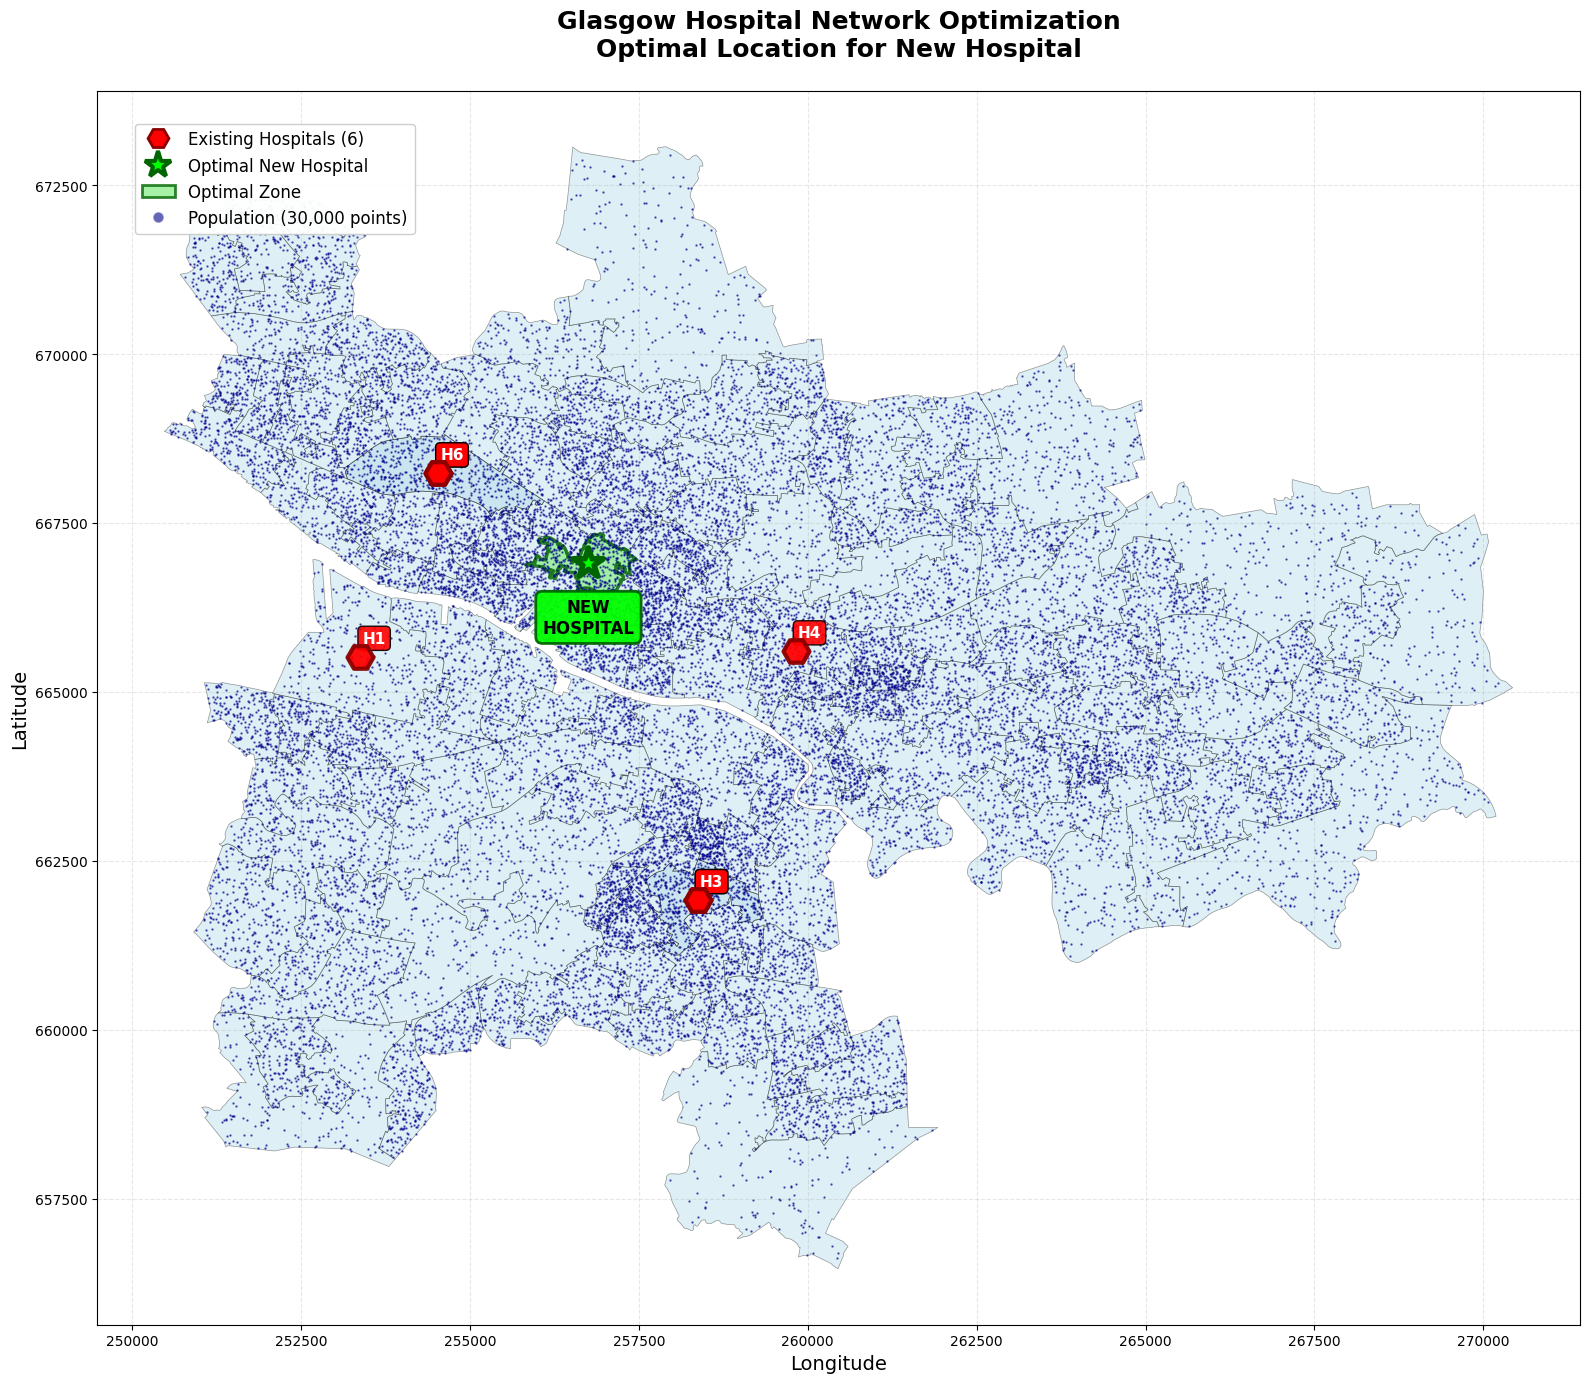


📈 OPTIMIZATION SUMMARY:
🎯 RECOMMENDED LOCATION: Kelvingrove and University
   Expected Impact:
   - Patients attracted: 4,817
   - Population coverage: 16.1%
   - Assignment probability: 0.1565

🏥 CURRENT HOSPITAL NETWORK:
   H1. Drumoyne and Shieldhall -> Queen Elizabeth University Hospital (6158 attendances)
   H2. Battlefield -> New Victoria Hospital (5210 attendances)
   H3. Battlefield -> New Victoria Hospital (2148 attendances)
   H4. City Centre East -> Glasgow Royal Infirmary (6964 attendances)
   H5. Kelvinside and Jordanhill -> Gartnavel Royal Hospital (No attendance data)
   H6. Kelvinside and Jordanhill -> Beatson West of Scotland Cancer Centre (No attendance data)

🔄 NETWORK IMPROVEMENT:
   - Current hospitals: 6
   - Proposed hospitals: 7
   - Additional coverage: +16.1% population
   - Strategic benefit: Optimal location identified

✅ Single optimal hospital location visualization complete!
💡 This map focuses on the single best location for maximum impact.


In [49]:
# Single optimal location visualization: existing hospitals + best new location only
print("🗺️ Creating visualization with single optimal hospital location...")
print("=" * 70)

if 'optimization_results' in locals() and 'large_sampled_points_gdf' in locals() and 'gdf_processed' in locals():
    
    # Extract optimization results
    results_df = optimization_results['results_df']
    optimal_zone = optimization_results['optimal_zone']
    hospital_df = optimization_results['hospital_df']
    
    print(f"📊 Visualization Components:")
    print(f"   - Population points: {len(large_sampled_points_gdf):,}")
    print(f"   - Existing hospitals: {len(hospital_df)}")
    print(f"   - Optimal new location: {optimal_zone['zone_name']}")
    print(f"   - Expected patients attracted: {optimal_zone['patients_attracted']:,}")
    
    # Create the simplified visualization
    fig, ax = plt.subplots(1, 1, figsize=(16, 14))
    
    # Plot all intermediate zones as base layer
    gdf_processed.plot(
        ax=ax,
        color='lightblue',
        edgecolor='black',
        linewidth=0.5,
        alpha=0.4
    )
    
    # Highlight the optimal zone
    optimal_zone_idx = optimal_zone['zone_idx']
    optimal_zone_geom = gdf_processed.iloc[optimal_zone_idx:optimal_zone_idx+1]
    
    optimal_zone_geom.plot(
        ax=ax,
        color='lightgreen',
        edgecolor='darkgreen',
        linewidth=2.5,
        alpha=0.8
    )
    
    # Plot population points
    large_sampled_points_gdf.plot(
        ax=ax,
        color='darkblue',
        markersize=0.5,
        alpha=0.6
    )
    
    # Plot existing hospitals as large red markers
    ax.scatter(
        hospital_df['centroid_x'], 
        hospital_df['centroid_y'],
        c='red', 
        s=350,  # Large size
        marker='H',  # Hospital marker shape
        edgecolors='darkred',
        linewidth=3,
        alpha=0.95,
        zorder=15,  # Ensure hospitals are on top
        label='Existing Hospitals'
    )
    
    # Plot the optimal new hospital location
    ax.scatter(
        optimal_zone['centroid_x'], 
        optimal_zone['centroid_y'],
        c='lime',
        s=500,  # Very large size to emphasize
        marker='*',
        edgecolors='darkgreen',
        linewidth=4,
        alpha=1.0,
        zorder=20,  # On top of everything
        label='Optimal New Hospital'
    )
    
    # Add labels for existing hospitals
    for idx, hospital in hospital_df.iterrows():
        ax.annotate(
            f"H{idx+1}", 
            (hospital['centroid_x'], hospital['centroid_y']),
            xytext=(10, 10),
            textcoords='offset points',
            fontsize=11,
            fontweight='bold',
            color='white',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.9),
            ha='center'
        )
    
    # Add prominent label for optimal location
    ax.annotate(
        f"NEW\nHOSPITAL", 
        (optimal_zone['centroid_x'], optimal_zone['centroid_y']),
        xytext=(0, -25),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold',
        color='black',
        bbox=dict(
            boxstyle='round,pad=0.4', 
            facecolor='lime', 
            edgecolor='darkgreen',
            linewidth=2,
            alpha=0.95
        ),
        ha='center',
        va='top'
    )
    
    # Customize the plot
    ax.set_title(
        f'Glasgow Hospital Network Optimization\nOptimal Location for New Hospital', 
        fontsize=18, fontweight='bold', pad=25
    )
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Create simplified legend
    legend_elements = [
        plt.Line2D([0], [0], marker='H', color='w', markerfacecolor='red', 
                  markersize=15, markeredgecolor='darkred', markeredgewidth=2, 
                  label=f'Existing Hospitals ({len(hospital_df)})'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='lime', 
                  markersize=20, markeredgecolor='darkgreen', markeredgewidth=3, 
                  label='Optimal New Hospital'),
        plt.Rectangle((0, 0), 1, 1, facecolor='lightgreen', edgecolor='darkgreen',
                     linewidth=2, alpha=0.8, label='Optimal Zone'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='darkblue', 
                  markersize=8, alpha=0.6, 
                  label=f'Population ({len(large_sampled_points_gdf):,} points)')
    ]
    
    # Create legend
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.98), 
             framealpha=0.95, fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print focused results
    print(f"\n📈 OPTIMIZATION SUMMARY:")
    print(f"🎯 RECOMMENDED LOCATION: {optimal_zone['zone_name']}")
    percentage = (optimal_zone['patients_attracted']/len(large_sampled_points_gdf))*100
    print(f"   Expected Impact:")
    print(f"   - Patients attracted: {optimal_zone['patients_attracted']:,}")
    print(f"   - Population coverage: {percentage:.1f}%")
    print(f"   - Assignment probability: {optimal_zone['avg_probability']:.4f}")
    
    print(f"\n🏥 CURRENT HOSPITAL NETWORK:")
    for i, hospital in hospital_df.iterrows():
        attendance = f"{hospital['attendance']:.0f} attendances" if pd.notna(hospital['attendance']) else "No attendance data"
        print(f"   H{i+1}. {hospital['name']} -> {hospital['hospital_name']} ({attendance})")
    
    print(f"\n🔄 NETWORK IMPROVEMENT:")
    print(f"   - Current hospitals: {len(hospital_df)}")
    print(f"   - Proposed hospitals: {len(hospital_df) + 1}")
    print(f"   - Additional coverage: +{percentage:.1f}% population")
    print(f"   - Strategic benefit: Optimal location identified")
    
    print(f"\n✅ Single optimal hospital location visualization complete!")
    print(f"💡 This map focuses on the single best location for maximum impact.")
    
else:
    print("❌ Run the hospital optimization cell first to generate results")